# ¡Hola, Daniel!  

Mi nombre es Carlos Ortiz, soy code reviewer de Practicum y voy a revisar el proyecto que acabas de desarrollar.

Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión. 

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma: 

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>

¡Empecemos!

# Optimización de gastos de Marketing

Te ha ido muy bien en el curso Practicum y te han ofrecido hacer prácticas en el departamento analítico de Y.Afisha. Tu primera tarea es ayudar a optimizar los gastos de marketing.
Lo que tienes:
- registros del servidor con datos sobre las visitas a Y.Afisha desde enero de 2017 hasta diciembre de 2018;
- archivo de volcado con todos los pedidos del período;
- estadísticas de gastos de marketing.

Lo que vas a investigar:
- cómo la gente usa el producto;
- cuándo empiezan a comprar;
- cuánto dinero trae cada cliente;
- cuándo pagan.

# Descripción de los datos

A continuación, se explican los datos que se encuentran en los archivos con los que se trabajarán:

La tabla `visits` (registros del servidor con datos sobre las visitas al sitio web):
- **Uid**: identificador único del usuario;
- **Device**: dispositivo del usuario;
- **Start Ts**: fecha y hora de inicio de la sesión;
- **End Ts**: fecha y hora de término de la sesión;
- **Source Id**: identificador de la fuente de anuncios de la que proviene el usuario.

Todas las fechas de esta tabla están en formato AAAA-MM-DD.

La tabla `orders` (datos sobre pedidos):
- **Uid**: identificador único del usuario que realiza un pedido;
- **Buy Ts**: fecha y hora del pedido;
- **Revenue**: ingresos de Y.Afisha de este pedido.

La tabla `costs` (datos sobre gastos de marketing):
- **source_id**: identificador de la fuente de anuncios
- **dt**: fecha;
- **costs**: gastos en esta fuente de anuncios en este día.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('mode.chained_assignment', None)
import seaborn as sns
from datetime import datetime
import re

## Descarga y preparación de datos para su análisis

Antes de poder trabajar con los datos, se optimizarán los mismos para evitar problemas de procesamiento. Para esto, se aplicarán los métodos aprendidos que se usan dentro de '.read_csv()' para mejorar los tipos de datos antes de su extracción y análisis.

Primero se sacará una muestra de los mismos para poder entender con lo que trabajaremos:

In [2]:
vi = pd.read_csv('/datasets/visits_log_us.csv', nrows=100)
o = pd.read_csv('/datasets/orders_log_us.csv', nrows=100)
co = pd.read_csv('/datasets/costs_us.csv', nrows=100)

In [3]:
vi.info(memory_usage='deep')
print()
print()
o.info(memory_usage='deep')
print()
print()
co.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Device     100 non-null    object
 1   End Ts     100 non-null    object
 2   Source Id  100 non-null    int64 
 3   Start Ts   100 non-null    object
 4   Uid        100 non-null    uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 22.7 KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   100 non-null    object 
 1   Revenue  100 non-null    float64
 2   Uid      100 non-null    uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 9.1 KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  100 n

In [4]:
vi['Device'].value_counts()

desktop    73
touch      27
Name: Device, dtype: int64

De la tabla visits podemos ver qu existen solo dos variables en la columna 'Device' por lo que aquí se puede usar el tipo de datos 'category'.

In [5]:
visits = pd.read_csv('/datasets/visits_log_us.csv', dtype={'Device':'category'}, parse_dates=['End Ts', 'Start Ts'])
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [6]:
orders = pd.read_csv('/datasets/orders_log_us.csv', parse_dates=['Buy Ts'])
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [7]:
costs = pd.read_csv('/datasets/costs_us.csv', parse_dates=['dt'])
costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


Para las 3 tablas se tienen columnas con fechas, pero con tipo de datos 'object'. Para dichas tablas se usará el parámetro 'parse_dates' dentro del método '.read_csv()' para convertirlas al formato datetime64 y así ahorrar menos espacio.

También, se pueden observar columnas cuyos nombres están en mayúsculas. Para evitar confusiones dichos nombres se escribirán con minúsculas con el método '.rename()':

In [8]:
visits.columns = visits.columns.str.lower()
visits.head()

,device,end ts,source id,start ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [9]:
orders.columns = orders.columns.str.lower()
orders.head()

,buy ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [10]:
visits['uid'] = visits['uid'].astype('str')
orders['uid'] = orders['uid'].astype('str')

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen inicio.
</div>

## Informes y cálculo de métricas

### Producto

Se tienen algunas preguntas por responder acerca del producto. Una de ellas es saber cuántas personas usan el producto cada día, semana y mes. Para poder hacer esto, es necesario primero separar las fechas de cada sesión en sus componentes individuales 'día', 'semana' y 'mes':

In [11]:
visits['month'] = visits['start ts'].astype('datetime64[M]')
visits['week'] = visits['start ts'].astype('datetime64[W]')
visits['date'] = visits['start ts'].dt.date
visits

,device,end ts,source id,start ts,uid,month,week,date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-01,2017-12-14,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-01,2018-02-15,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-01,2018-05-17,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-01,2017-12-21,2017-12-27
...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017-07-01,2017-07-27,2017-07-29
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-01,2018-01-25,2018-01-25
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-03-01,2018-03-01,2018-03-03
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-11-01,2017-11-02,2017-11-02


In [12]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end ts     359400 non-null  datetime64[ns]
 2   source id  359400 non-null  int64         
 3   start ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  object        
 5   month      359400 non-null  datetime64[ns]
 6   week       359400 non-null  datetime64[ns]
 7   date       359400 non-null  object        
dtypes: category(1), datetime64[ns](4), int64(1), object(2)
memory usage: 19.5+ MB


<div class="alert alert-block alert-info">
<b>Así es como dices?
    No entiendo muy bien cómo funciona el dt.month o dt.week para que me diera el dato que quería, pero aún así lo tuviera en [ns]. Es un estándar de esa función?
    </b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-info">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si lo dejas como `dt.month` o `dt.week` no tendrá en cuenta el año y puede darse una imprecisión en la info.
</div>

#### Cantidad de usuarios

Una vez separados los componentes, se harán tablas dinámicas en donde se podrán observar la cantidad de usuarios únicos que tuvieron actividad dentro de la plataforma para cada mes, semana y día:

In [13]:
visits_m = visits.groupby('month').agg({'uid':'nunique'})
visits_m.head(10)

,uid
month,
2017-06-01,13259
2017-07-01,14183
2017-08-01,11631
2017-09-01,18975
2017-10-01,29692
2017-11-01,32797
2017-12-01,31557
2018-01-01,28716
2018-02-01,28749


Text(0, 0.5, 'Number of Users')

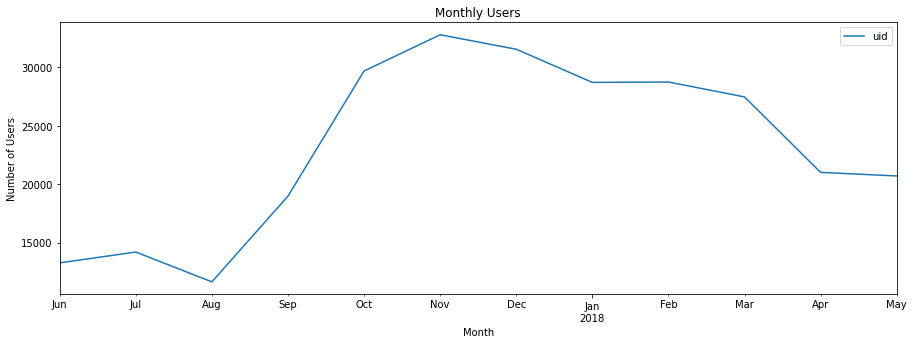

In [14]:
visits_m.plot(figsize=(15,5))
plt.title('Monthly Users')
plt.xlabel('Month')
plt.ylabel('Number of Users')

In [15]:
mau = visits.groupby('month').agg({'uid':'nunique'}).mean()
mau

uid    23228.416667
dtype: float64

En este primer resultado de usuarios por mes, podemos ver cómo la cantidad de usuarios a mediados de año es mucho menor que en los últimos 3 meses del año. Se puede ver como el valor mínimo se encuentra en Agosto con 11631 usuarios para luego alzarse hasta su valor máxmo en Noviembre con 32797, con un cambio drástico a partir de Septiembre que subió más de 7 mil usuarios con diferencia a Agosto. A partir de Noviembre, los usuarios empiezan a bajar a un nivel menor con el que subieron.

Según la MAU, o actividad mensual promedio, la página tiene un promedio de 23229 usuarios activos únicos.

In [16]:
visits_w = visits.groupby('week').agg({'uid':'nunique'})
visits_w.head()

,uid
week,
2017-06-01,4082
2017-06-08,3311
2017-06-15,2844
2017-06-22,3079
2017-06-29,3055


Text(0, 0.5, 'Number of Users')

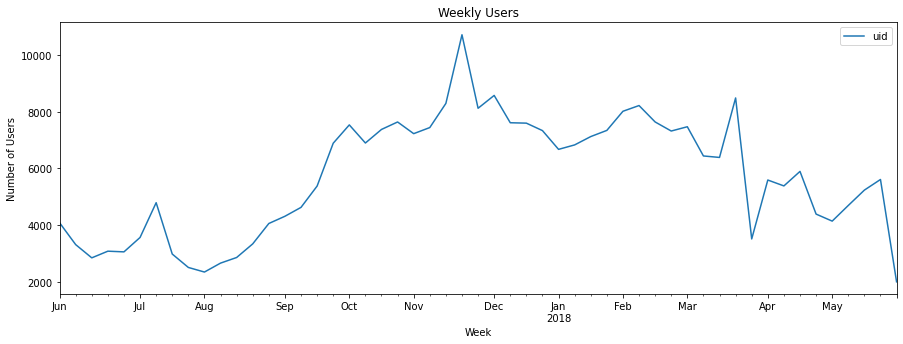

In [17]:
visits_w.plot(figsize=(15,5))
plt.title('Weekly Users')
plt.xlabel('Week')
plt.ylabel('Number of Users')

In [18]:
wau = visits.groupby('week').agg({'uid':'nunique'}).mean()
wau

uid    5724.415094
dtype: float64

De una manera un poco más específica, pero conservando el mismo patrón que el gráfico mensual, se puede observar como el menor número de usuarios se presenta en Agostos y su pico máximo a mediados de Noviembre. Se pueden apreciar cambios de nivel, por lo general, a principios de cada mes para luego caer a mediados del mismo.

Esta gráfica nos ayuda a observar comportamientos más específicos de los usuarios a lo largo del tiempo en comparación de una imagen mensual.

Según la WAU, o actividad semanal promedio, la página tiene un promedio de 5725 usuarios activos únicos.

In [19]:
visits_d = visits.groupby('date').agg({'uid':'nunique'})
visits_d.head(10)

,uid
date,
2017-06-01,605
2017-06-02,608
2017-06-03,445
2017-06-04,476
2017-06-05,820
2017-06-06,797
2017-06-07,699
2017-06-08,868
2017-06-09,695


Text(0, 0.5, 'Number of Users')

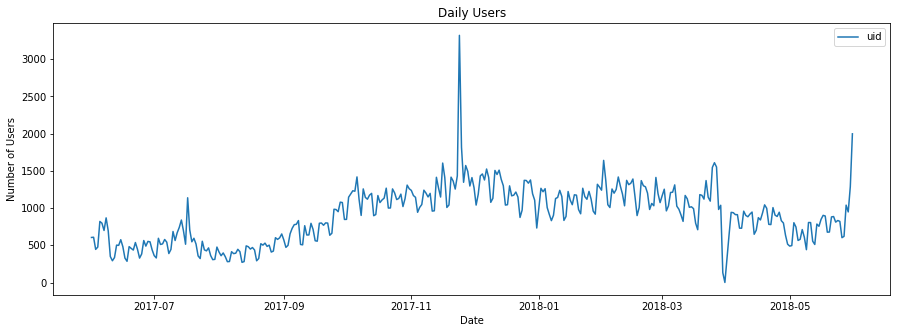

In [20]:
visits_d.plot(figsize=(15,5))
plt.title('Daily Users')
plt.xlabel('Date')
plt.ylabel('Number of Users')

In [21]:
dau = visits.groupby('date').agg({'uid':'nunique'}).mean()
dau

uid    907.991758
dtype: float64

En esta gráfica, se puede observar con mejor detalle lo que se mencionaba en el gráfico anterior. Los niveles de usuarios suben y bajan cada semana. Pareciera que en algún punto de cada semana los usuarios vienen y en otro punto de la misma semana usuarios se van.

Se observan picos muy pronunciados a mediados de Noviembre, una caída fuerte en Abril (pudo deberse a algún problema?) y otra subida en Junio.

Según la DAU, o actividad diaria promedio, la página tiene un promedio de 908 usuarios activos únicos.

#### Cantidad de sesiones diarias

Otra duda es el número de sesiones que se abrían por día. Considerando que una persona, o usuario, pudiera abrir varias sesiones en un día, es necesario contar el número de sesiones y no los usuarios únicos para poder sacar un resultado adecuado:

In [22]:
sessions_d = visits.groupby('date').agg({'uid':'count'})
sessions_d.head(10)

,uid
date,
2017-06-01,664
2017-06-02,658
2017-06-03,477
2017-06-04,510
2017-06-05,893
2017-06-06,875
2017-06-07,788
2017-06-08,939
2017-06-09,755


Text(0, 0.5, 'Number of Users')

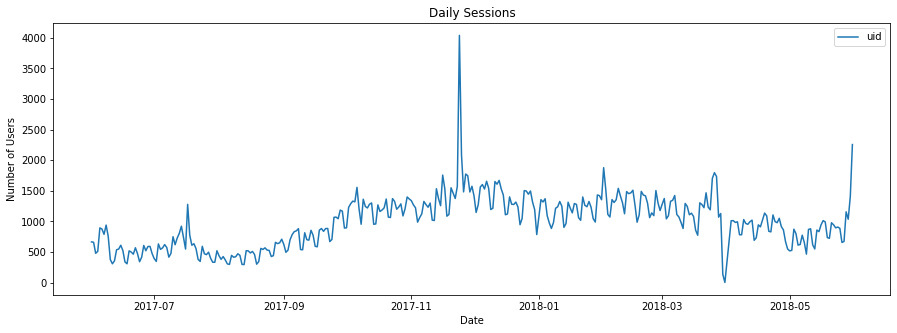

In [23]:
sessions_d.plot(figsize=(15,5))
plt.title('Daily Sessions')
plt.xlabel('Date')
plt.ylabel('Number of Users')

En la gráfica con cantidad de sesiones diarias se puede ver un comportamiento similar al número de usuarios activos. La diferencia es que, en esta gráfica, los valores son mayores debido al conteo repetido de algunos usuarios.

In [24]:
sessions_u = visits.groupby('uid').agg({'start ts':'count'}).sort_values(by='start ts', ascending=False).head(1000)
sessions_u

,start ts
uid,
12869801667763685675,893
3263486045884611639,615
11255648391090536411,551
17030528792926543083,357
8056418121947262981,343
...,...
968199526439338247,12
17861930827877674018,12
12382403528482784542,12


Text(0, 0.5, 'Total Sessions')

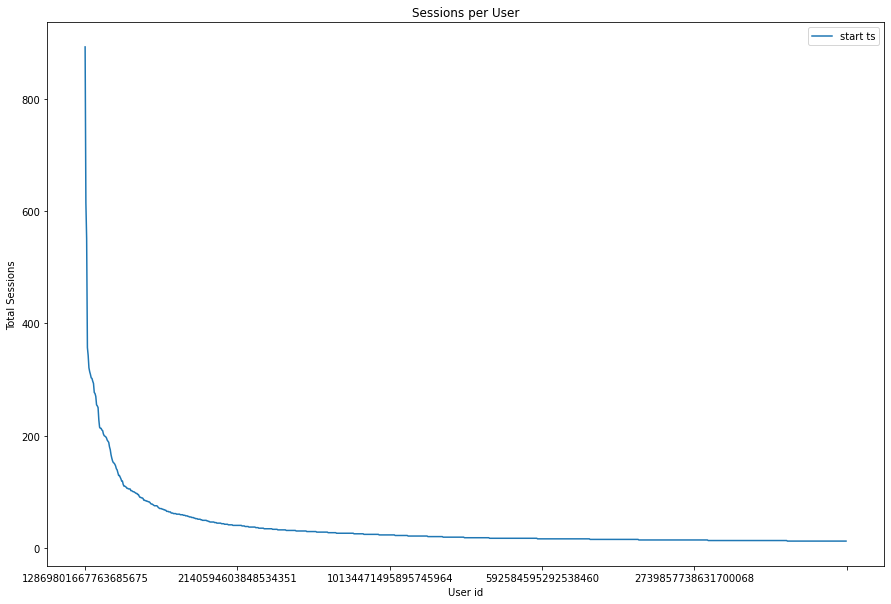

In [25]:
sessions_u.plot(figsize=(15,10))
plt.title('Sessions per User')
plt.xlabel('User id')
plt.ylabel('Total Sessions')

Al graficar el número de sesiones por usuario, se puede observar que, en comparación a la cantidad de usuarios que hay, son muy pocos aquellos que están por encima de las 100 sesiones totales. Esto podría dar a entender que son muy pocos los usuarios que son realmente leales a la plataforma.

En la gráfica de arriba no se observan todos los usuarios. Debido a la gran cantidad de datos, se tuvo que recortar la tabla a 1000 usuarios para poder observar una tendencia en los datos. De igual manera, se pueden observar ejemplos de algunos id de usuarios y cómo se ve la cantidad de sesiones efectuadas en comparación a otros usuarios.

#### Duración por sesión

Una tercera pregunta es, cuál es la duración de cada sesión. Para esto, es necesario restar el tiempo en el que se inicio la sesión al tiempo en el que se cerró la sesión y así conocer la duración en segundos en la que cada usuario permaneció en la misma:

In [26]:
visits['duration'] = (visits['end ts'] - visits['start ts']).dt.seconds
visits

,device,end ts,source id,start ts,uid,month,week,date,duration
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-01,2017-12-14,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-01,2018-02-15,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-01,2018-05-17,2018-05-20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-01,2017-12-21,2017-12-27,0
...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017-07-01,2017-07-27,2017-07-29,19
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-01,2018-01-25,2018-01-25,19
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-03-01,2018-03-01,2018-03-03,19
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-11-01,2017-11-02,2017-11-02,19


<AxesSubplot:>

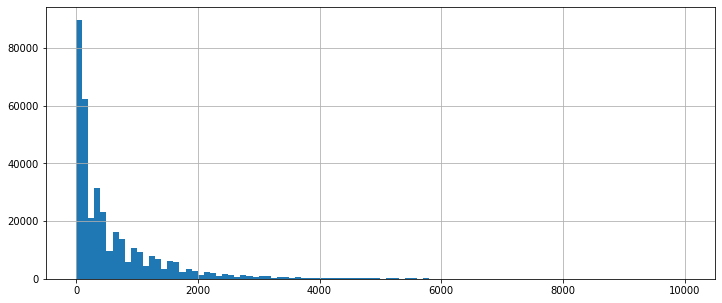

In [27]:
visits['duration'].hist(bins=100, range=(0, 10000), figsize=(12,5))

<AxesSubplot:>

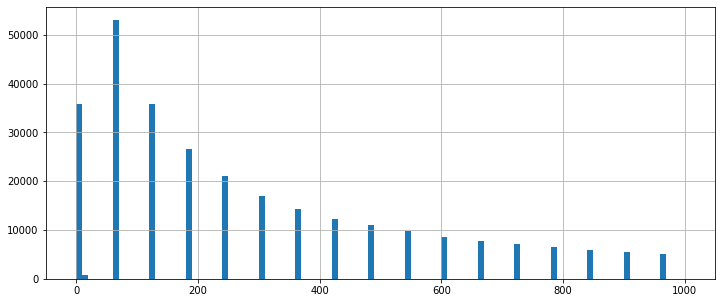

In [28]:
visits['duration'].hist(bins=100, range=(0, 1000), figsize=(12,5))

In [29]:
asl_mo = visits['duration'].mode()
asl_mo

0    60
dtype: int64

In [30]:
asl_mn = visits['duration'].mean()
asl_mn

643.506488592098

In [31]:
asl_mdn = visits['duration'].median()
asl_mdn

300.0

Para poder tener un mejor entendimiento de los resultados, un histograma es de gran ayuda. Podemos ver cómo la mayoría de los resultados se concentran en la parte izquiera del histograma. Reduciendo el límite horizontal, se puede observar que gran número de sesiones duraron menos de 200 segundos. Incluso se pueden observar sesiones, cerca de 35000, tuvieron duración de 0 segundos... es raro, pero pueden haber razón para esto. Pudieron ocurrir errores en la plataforma al querer ingresar, error en la conexión del usuario, cerrados automaticos del browser quizá, entre otros.

Sacando las tres medidas de tendencia central; moda, media y mediana, se puede interpretar lo mismo. Teniendo la media en 644 segundos y le mediana en 300 segundos, nos indica que, en efecto, los datos se encuentran cargados hacia la izquierda. Estos dos valores se alejan demasiado de los 60 segundos que marca la moda. Recordemos que la moda es preferible usarla cuando contamos con una distribución sesgada y la media y la mediana no son confiables.

#### Tasa de retención

Y como 4a duda se tenía, con qué frecuencia los usuarios y usuarias regresaban a la plataforma? O en otras palabras, la tasa de retención. Para esto, es necesario definir los ciclos de vida de cada sesión empezando por sacar la fecha en la que cada usuario tuvo su primera interacción con la página...

In [32]:
fst_act_user = visits.groupby(['uid'])['month'].min()
fst_act_user.name = 'fst_act_user'
fst_act_user

uid
10000171586432207426   2017-12-01
10000344846682484395   2018-02-01
1000036778515242839    2017-09-01
10000460875579931334   2017-09-01
10000558740593440652   2018-01-01
                          ...    
9999530179466660745    2017-06-01
9999704916412649026    2017-06-01
9999829453910784044    2017-11-01
9999912853550499774    2017-08-01
9999996800317156310    2017-11-01
Name: fst_act_user, Length: 228169, dtype: datetime64[ns]

In [33]:
fst_act_date = visits.groupby(['uid'])['start ts'].min().dt.date
fst_act_date = pd.to_datetime(fst_act_date)
fst_act_date.name = 'fst_act_date'
fst_act_date

uid
10000171586432207426   2017-12-01
10000344846682484395   2018-02-21
1000036778515242839    2017-09-05
10000460875579931334   2017-09-13
10000558740593440652   2018-01-03
                          ...    
9999530179466660745    2017-06-14
9999704916412649026    2017-06-29
9999829453910784044    2017-11-09
9999912853550499774    2017-08-18
9999996800317156310    2017-11-24
Name: fst_act_date, Length: 228169, dtype: datetime64[ns]

... unimos la tabla con la fecha de la primera interacción a la tabla de visitas original, ...

In [34]:
visits = visits.merge(fst_act_user, on='uid')
visits

,device,end ts,source id,start ts,uid,month,week,date,duration,fst_act_user
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-01,2017-12-14,2017-12-20,1080,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-01,2018-02-15,2018-02-19,1680,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-01,2018-05-17,2018-05-20,1440,2018-03-01
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-01,2018-03-08,2018-03-09,1680,2018-03-01
...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2018-04-23 21:19:00,10,2018-04-23 21:11:00,12734910664455613822,2018-04-01,2018-04-19,2018-04-23,480,2018-04-01
359396,desktop,2017-11-08 13:39:00,4,2017-11-08 13:39:00,6761309174945977743,2017-11-01,2017-11-02,2017-11-08,0,2017-11-01
359397,desktop,2017-07-31 12:31:00,3,2017-07-31 12:13:00,11102751930812818282,2017-07-01,2017-07-27,2017-07-31,1080,2017-07-01
359398,desktop,2018-03-20 15:25:00,4,2018-03-20 15:11:00,272012551460639309,2018-03-01,2018-03-15,2018-03-20,840,2018-03-01


Una vez obtenidas solamente las fechas creamos una columna en donde se vea reflejado el tiempo de vida de esa cohorte o grupo de usuarios en ese tiempo. Para esto, restamos las dos columnas creadas anteriormente; la fecha de la actividad de 'n' fila menos la fecha de la primera sesión realizada por el usuario de esa fila. 

La división de las cohortes se realiza por meses para evitar que sean muchos los campos a graficar posteriormente.

In [35]:
visits['cohort_lt'] = visits['month'] - visits['fst_act_user']
visits['cohort_lt'] = visits['cohort_lt'] / np.timedelta64(1, 'M')
visits['cohort_lt'] = visits['cohort_lt'].round().astype('int')
visits.head(10)

,device,end ts,source id,start ts,uid,month,week,date,duration,fst_act_user,cohort_lt
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-01,2017-12-14,2017-12-20,1080,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-01,2018-02-15,2018-02-19,1680,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-01,2018-05-17,2018-05-20,1440,2018-03-01,2
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-01,2018-03-08,2018-03-09,1680,2018-03-01,0
5,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-01,2017-12-21,2017-12-27,0,2017-12-01,0
6,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09-01,2017-08-31,2017-09-03,60,2017-09-01,0
7,desktop,2017-10-27 16:02:00,3,2017-10-27 15:20:00,16007536194108375387,2017-10-01,2017-10-26,2017-10-27,2520,2017-09-01,1
8,desktop,2017-09-04 17:56:00,4,2017-09-04 17:37:00,16007536194108375387,2017-09-01,2017-08-31,2017-09-04,1140,2017-09-01,0
9,desktop,2017-10-28 00:04:00,3,2017-10-27 23:56:00,16007536194108375387,2017-10-01,2017-10-26,2017-10-27,480,2017-09-01,1


In [36]:
visits['fst_act_user'] = visits['fst_act_user'].dt.strftime('%Y-%m-%d') 

In [37]:
coho_us_piv = visits.pivot_table(index='fst_act_user', columns='cohort_lt', values='uid', aggfunc='nunique')
coho_us_piv

cohort_lt,0,1,2,3,4,5,6,7,8,9,10,11
fst_act_user,,,,,,,,,,,,
2017-06-01,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07-01,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0,NaN
2017-08-01,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0,NaN,NaN
2017-09-01,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0,NaN,NaN,NaN
2017-10-01,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0,NaN,NaN,NaN,NaN
2017-11-01,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0,NaN,NaN,NaN,NaN,NaN
2017-12-01,25268.0,1410.0,960.0,786.0,512.0,481.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,22624.0,1351.0,890.0,565.0,458.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,22197.0,1267.0,565.0,446.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


En la tabla dinámica de arriba, tenemos la fecha de cada cohorte, su tiempo de vida y el número de usuarios que se encuentran en cada uno de los grupos.

In [38]:
ret_rate = coho_us_piv.div(coho_us_piv[0], axis=0)
ret_rate

cohort_lt,0,1,2,3,4,5,6,7,8,9,10,11
fst_act_user,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'Tasa de Retención mensual'}, xlabel='cohort_lt', ylabel='fst_act_user'>

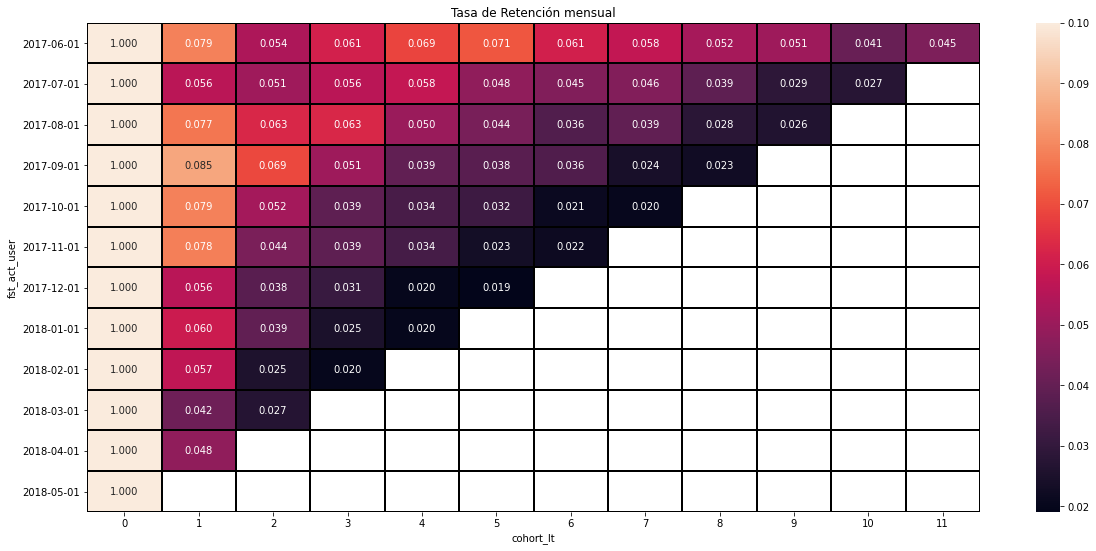

In [39]:
plt.figure(figsize=(20,9))
plt.title('Tasa de Retención mensual')
sns.heatmap(ret_rate, annot=True, fmt='.3f', linewidths=1, linecolor='black', vmax=0.1)

Una vez obtenida la tabla con el número de usuarios que había en cada cohorte se pasó a dividir todos los campos entre la cantidad de usuarios que había al principio de cierto grupo. Al hacer esto, se puede obtener la proporción de usuarios que se encontraban en cierta cohorte a lo largo del tiempo.

En la tabla anterior se puede observar que, aunque no se tiene la misma cantidad que en un comienzo, hay clientes que aún así regresan a la plataforma. Según los datos obtenidos ariba, estos regresan cada vez en menor cantidad.

### Ventas

#### Tiempo antes de comprar

In [40]:
visits.head()

,device,end ts,source id,start ts,uid,month,week,date,duration,fst_act_user,cohort_lt
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-01,2017-12-14,2017-12-20,1080,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-01,2018-02-15,2018-02-19,1680,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-01,2018-05-17,2018-05-20,1440,2018-03-01,2
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-01,2018-03-08,2018-03-09,1680,2018-03-01,0


Igual que como hicimos en la tabla visits, es mejor quitar las horas de cada sesión y así quedarnos solo con las fechas de cada una de las columnas que trabaje con fechas.

Después será necesario unir la tabla resultante a la tabla orders para así tener la relación entre las fechas de sesión y las fechas de compra.

In [41]:
orders

,buy ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [42]:
time_orders = orders.groupby(['uid']).agg({'buy ts':'min'}).reset_index()
time_orders['buy ts'] = time_orders['buy ts'].dt.date
time_orders

,uid,buy ts
0,10000837700716403746,2017-06-21
1,10000997030965831953,2018-01-19
2,10001199569370567060,2017-11-25
3,10002243978166172255,2017-10-15
4,10003351403065971701,2017-11-20
...,...,...
36518,999745712858219747,2017-08-08
36519,9997777271989789335,2017-11-17
36520,999906621142257600,2018-01-26
36521,9999334409150825432,2017-12-06


De nuestra tabla orders sacamos la información necesaria. En este caso, sacamos el id de usuario junto con la fecha en la que compró algo. Como muchos clientes realizan más de una compra, tomaremos solo aquellas fechas que representen la primera compra que el usuario realizó.

Además, jalamos el objeto Series 'fst_act_date' que representa la fecha de la primera vez que tal usuario ingresó a la plataforma.

Restando estos dos datos, fecha de compra menos la fecha de la primera interacción del cliente, será posible encontrar el tiempo que hay entre el registro hasta que el usuario se convierte en cliente.

In [43]:
fst_act_date

uid
10000171586432207426   2017-12-01
10000344846682484395   2018-02-21
1000036778515242839    2017-09-05
10000460875579931334   2017-09-13
10000558740593440652   2018-01-03
                          ...    
9999530179466660745    2017-06-14
9999704916412649026    2017-06-29
9999829453910784044    2017-11-09
9999912853550499774    2017-08-18
9999996800317156310    2017-11-24
Name: fst_act_date, Length: 228169, dtype: datetime64[ns]

Aquí juntamos la tabla con la primera fecha de compra y la primera fecha de interacción del cliente.

In [44]:
buy_time = time_orders.merge(fst_act_date, on='uid')
buy_time

,uid,buy ts,fst_act_date
0,10000837700716403746,2017-06-21,2017-06-08
1,10000997030965831953,2018-01-19,2018-01-19
2,10001199569370567060,2017-11-25,2017-11-25
3,10002243978166172255,2017-10-15,2017-10-15
4,10003351403065971701,2017-11-20,2017-11-20
...,...,...,...
36518,999745712858219747,2017-08-08,2017-08-08
36519,9997777271989789335,2017-11-17,2017-11-17
36520,999906621142257600,2018-01-26,2018-01-26
36521,9999334409150825432,2017-12-06,2017-12-06


Convertimos la columna 'buy ts' de la tabla con pedidos para poder tener dos columnas posibles de restar.

In [45]:
buy_time['buy ts'] =  pd.to_datetime(buy_time['buy ts'])
buy_time

,uid,buy ts,fst_act_date
0,10000837700716403746,2017-06-21,2017-06-08
1,10000997030965831953,2018-01-19,2018-01-19
2,10001199569370567060,2017-11-25,2017-11-25
3,10002243978166172255,2017-10-15,2017-10-15
4,10003351403065971701,2017-11-20,2017-11-20
...,...,...,...
36518,999745712858219747,2017-08-08,2017-08-08
36519,9997777271989789335,2017-11-17,2017-11-17
36520,999906621142257600,2018-01-26,2018-01-26
36521,9999334409150825432,2017-12-06,2017-12-06


In [46]:
buy_time['time_to_buy'] = buy_time['buy ts'] - buy_time['fst_act_date']
buy_time

,uid,buy ts,fst_act_date,time_to_buy
0,10000837700716403746,2017-06-21,2017-06-08,13 days
1,10000997030965831953,2018-01-19,2018-01-19,0 days
2,10001199569370567060,2017-11-25,2017-11-25,0 days
3,10002243978166172255,2017-10-15,2017-10-15,0 days
4,10003351403065971701,2017-11-20,2017-11-20,0 days
...,...,...,...,...
36518,999745712858219747,2017-08-08,2017-08-08,0 days
36519,9997777271989789335,2017-11-17,2017-11-17,0 days
36520,999906621142257600,2018-01-26,2018-01-26,0 days
36521,9999334409150825432,2017-12-06,2017-12-06,0 days


In [47]:
buy_time['time_to_buy'] = buy_time['time_to_buy'].astype('str')
buy_time

,uid,buy ts,fst_act_date,time_to_buy
0,10000837700716403746,2017-06-21,2017-06-08,13 days
1,10000997030965831953,2018-01-19,2018-01-19,0 days
2,10001199569370567060,2017-11-25,2017-11-25,0 days
3,10002243978166172255,2017-10-15,2017-10-15,0 days
4,10003351403065971701,2017-11-20,2017-11-20,0 days
...,...,...,...,...
36518,999745712858219747,2017-08-08,2017-08-08,0 days
36519,9997777271989789335,2017-11-17,2017-11-17,0 days
36520,999906621142257600,2018-01-26,2018-01-26,0 days
36521,9999334409150825432,2017-12-06,2017-12-06,0 days


Una vez teniendo el tiempo que tarda cada usuario en convertirse a cliente, aislamos solamente la cantidad de tiempo junto con la cantidad de clientes que tardaron dicho tiempo...

In [48]:
buy_time_piv = buy_time.pivot_table(index='time_to_buy', values='uid', aggfunc='count').sort_values(by='uid', ascending=False)
buy_time_piv

,uid
time_to_buy,
0 days,25039
1 days,1966
2 days,685
3 days,452
4 days,386
...,...
314 days,1
358 days,1
300 days,1


(-0.5, 20.0)

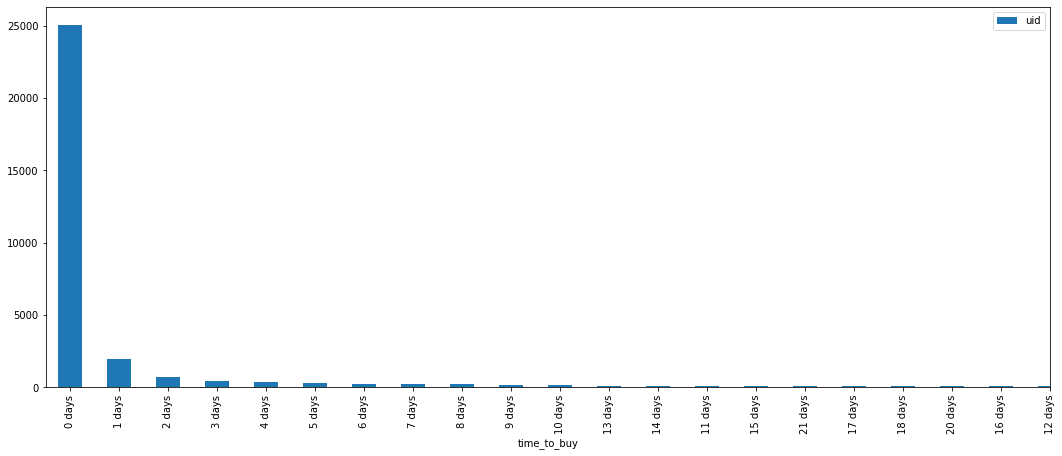

In [49]:
buy_time_piv.plot(kind='bar', figsize=(18,7))
plt.xlim(-0.5, 20)

Tras la tabla dinámica y el gráfico, podemos ver que la mayor cantidad de usuarios tardan menos de un día en convertirse en clientes. Según la gráfica, 25039 personas se registraron en la página y ese mismo día ya estaban comprando algo. Aún así, estamos hablando de 36523 clientes totales. Esto significa que más de 11000 clientes tardan más en comprar. Casi una tercera parte de los clientes.

#### Pedidos por mes

In [50]:
orders['month'] = orders['buy ts'].astype('datetime64[M]')
orders.head()

,buy ts,revenue,uid,month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01


In [51]:
cohort_gr_ord = orders.groupby('month').agg({'uid':'count'})
cohort_gr_ord

,uid
month,
2017-06-01,2354
2017-07-01,2363
2017-08-01,1807
2017-09-01,3387
2017-10-01,5679
2017-11-01,5659
2017-12-01,6218
2018-01-01,4721
2018-02-01,5281


Text(0, 0.5, 'Orders')

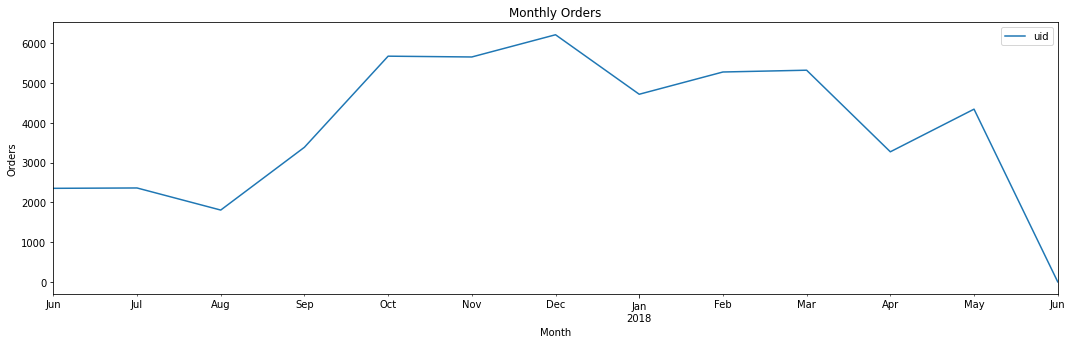

In [52]:
cohort_gr_ord.plot(figsize=(18,5))
plt.title('Monthly Orders')
plt.xlabel('Month')
plt.ylabel('Orders')

Para ver los pedidos hechos por mes, se agupa la tabla por mes de compra y se cuenta la cantidad de cada mes. Se puede observar que el mes con mayor compras fue Diciembre. De cerca le siguen los meses de Octubre y Noviembre.

#### Compras promedio

In [53]:
cohort_gr_buy = orders.groupby('month').agg({'revenue':'mean'})
cohort_gr_buy

,revenue
month,
2017-06-01,4.060106
2017-07-01,5.306589
2017-08-01,4.847139
2017-09-01,5.416448
2017-10-01,4.928280
2017-11-01,4.783518
2017-12-01,5.852139
2018-01-01,4.112927
2018-02-01,4.840095


Text(0, 0.5, 'Average Income')

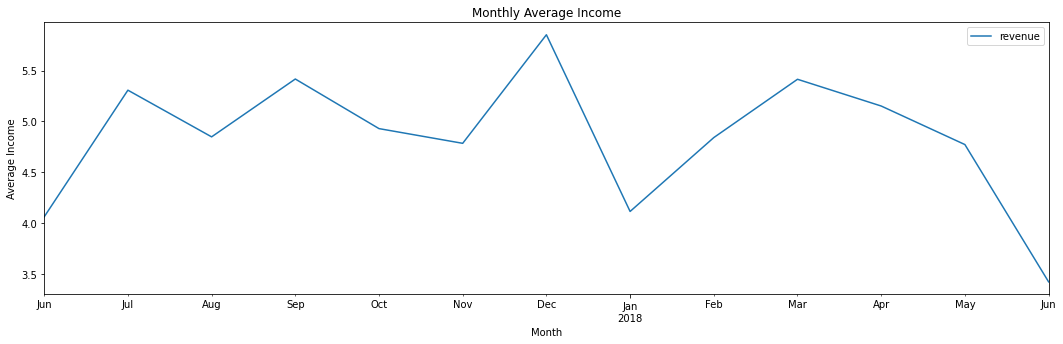

In [54]:
cohort_gr_buy.plot(figsize=(18,5))
plt.title('Monthly Average Income')
plt.xlabel('Month')
plt.ylabel('Average Income')

Siguiendo la misma lógica de cálculo que el número de pedidos mensual, las compras promedio por usuario revelan que en diciembre también, en promedio, el usuario gastó más, mientras que en Junio se gastó menos.

#### LTV

In [55]:
costs['month'] = costs['dt'].astype('datetime64[M]')
costs.columns = ['source id', 'date', 'costs', 'month']
costs.head()

,source id,date,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


Para el cálculo del LTV es necesario crear cohortes mensuales. Para eso, se calcula el mes en el que se hizo alguna compra, luego, calcular el mes en el que cada cliente realizó su primera orden, ...

In [56]:
fst_ord = orders.groupby('uid').agg({'month':'min'}).reset_index()
fst_ord.columns = ['uid', 'fst_ord_month']
fst_ord.head()

,uid,fst_ord_month
0,10000837700716403746,2017-06-01
1,10000997030965831953,2018-01-01
2,10001199569370567060,2017-11-01
3,10002243978166172255,2017-10-01
4,10003351403065971701,2017-11-01


In [57]:
coho_siz = fst_ord.groupby('fst_ord_month').agg({'uid':'nunique'}).reset_index()
coho_siz.columns = ['fst_ord_month', 'n_clients']
coho_siz.head()

,fst_ord_month,n_clients
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


... y buscamos el número de usuarios que realizaron alguna compra.

Una vez teniendo lo anterior, crearemos las cohortes. 

Primero, se unirán las tablas de orders y fst_ord para tener sus datos mensuales juntos.

In [58]:
orderss = orders.merge(fst_ord, on='uid')
orderss.head()

,buy ts,revenue,uid,month,fst_ord_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01


Ahora se calcularán los ingresos agrupando los datos del mes de la primera orden del usuario y el mes de la orden.

In [59]:
cohorts = orderss.groupby(['fst_ord_month', 'month']).agg({'revenue':'sum'}).reset_index()
cohorts.head()

,fst_ord_month,month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


Con esto, se calcula la cantidad de usuarios que generaron cierto ingreso en cada mes...

In [60]:
report = coho_siz.merge(cohorts, on='fst_ord_month')
report.head()

,fst_ord_month,n_clients,month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


Ahora, se calcula el gross profit con un margen de ganancia del 50%.

Luego, asignamos la edad de cada cohorte.

In [61]:
report['gp'] = report['revenue']
report['age'] = (report['month'] - report['fst_ord_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report.head()

,fst_ord_month,n_clients,month,revenue,gp,age
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0
1,2017-06-01,2023,2017-07-01,981.82,981.82,1
2,2017-06-01,2023,2017-08-01,885.34,885.34,2
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4


In [62]:
report['fst_ord_month'] = report['fst_ord_month'].dt.strftime('%Y-%m-%d') 

Con lo anterior, ya es posible calcular el dinero que cada cliente desembolsa, por lo que es necesario dividir el beneficio bruto entre el número de clientes.

In [63]:
report['ltv'] = report['gp'] / report['n_clients']
report.head()

,fst_ord_month,n_clients,month,revenue,gp,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4,1.022531


<AxesSubplot:title={'center':'Gasto por cliente promedio mensual'}, xlabel='age', ylabel='fst_ord_month'>

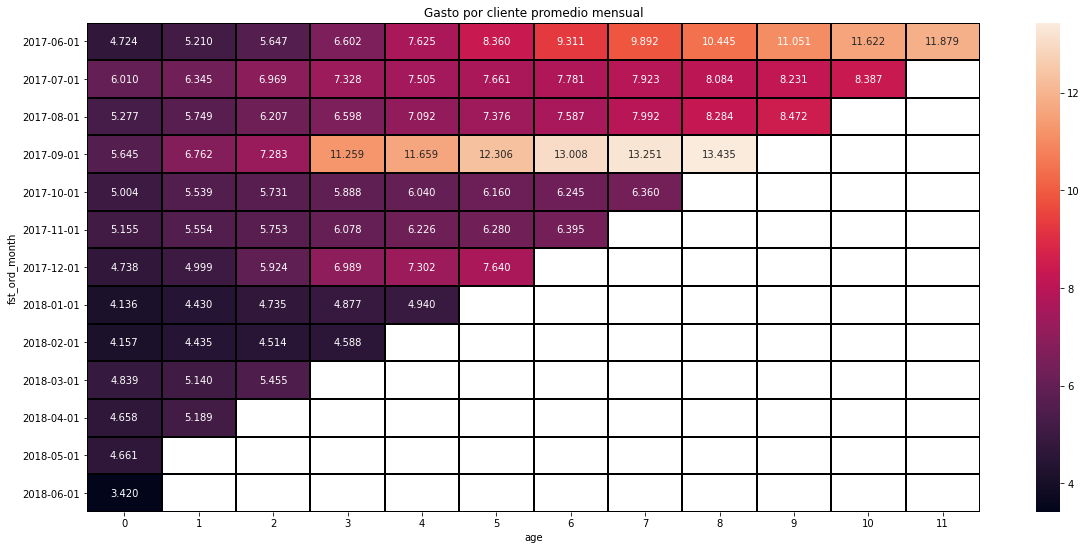

In [64]:
final_ventas = report.pivot_table(index='fst_ord_month', columns='age', values='ltv', aggfunc='sum').cumsum(axis=1)
final_ventas

plt.figure(figsize=(20,9))
plt.title('Gasto por cliente promedio mensual')
sns.heatmap(final_ventas, annot=True, fmt='.3f', linewidths=1, linecolor='black')

Teniendo el heatmap anterior, es posible visibilizar de forma más sencilla en qué cohortes se tuvieron mayores ingresos promedio por cliente. Por ejemplo, en la cohorte de Julio del 2017 se puede observar que tuvo el gasto por cliente al registrar poco más de 6 dolares y ha estado aumentando gradualmente. El mismo comportamiento a la alta se puede observar en los demás meses.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Perfecto. Mucho mejor.
</div>

### Marketing

#### Costos por fuente

Para poder encontrar el costo de adquisión de clientes, primero hay que calcular los costos mensuales para cada fuente.

In [65]:
adv_costs = costs.pivot_table(index='month', columns='source id', values='costs', aggfunc='sum')
adv_costs

source id,1,2,3,4,5,9,10
month,,,,,,,
2017-06-01,1125.61,2427.38,7731.65,3514.80,2616.12,285.22,314.22
2017-07-01,1072.88,2333.11,7674.37,3529.73,2998.14,302.54,329.82
2017-08-01,951.81,1811.05,6143.54,3217.36,2185.28,248.93,232.57
2017-09-01,1502.01,2985.66,9963.55,5192.26,3849.14,415.62,460.67
2017-10-01,2315.75,4845.00,15737.24,6420.84,5767.40,609.41,627.24
2017-11-01,2445.16,5247.68,17025.34,5388.82,6325.34,683.18,792.36
2017-12-01,2341.20,4897.80,16219.52,7680.47,5872.52,657.98,645.86
2018-01-01,2186.18,4157.74,14808.78,5832.79,5371.52,547.16,614.35
2018-02-01,2204.48,4474.34,14228.56,5711.96,5071.31,551.50,480.88


<AxesSubplot:xlabel='month'>

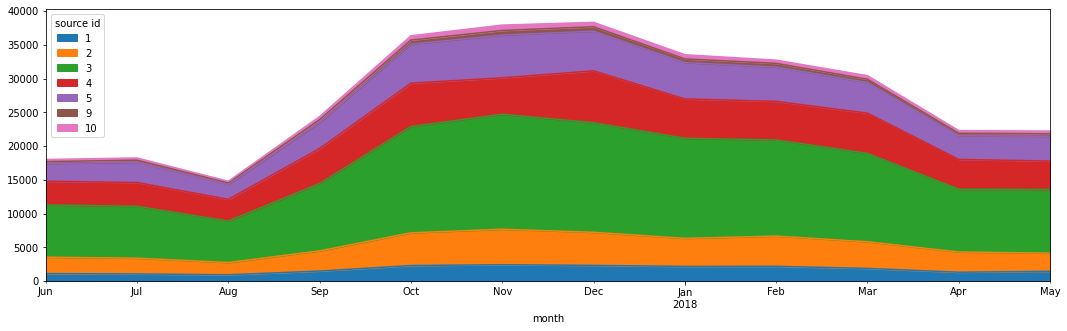

In [66]:
adv_costs.plot.area(figsize=(18,5))

<AxesSubplot:xlabel='month'>

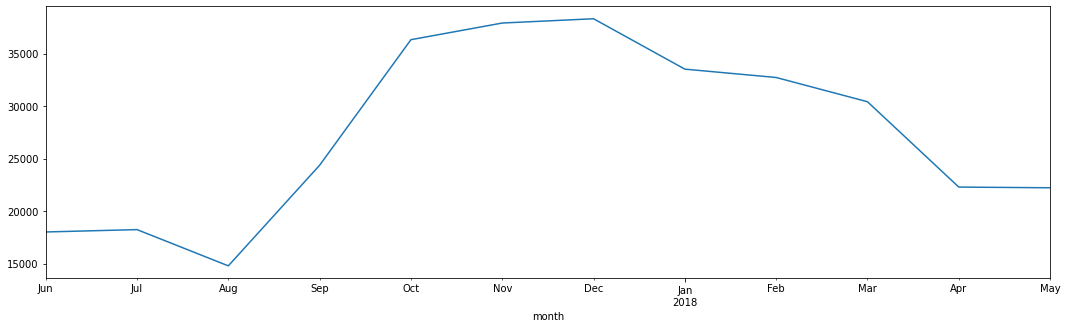

In [67]:
adv_costs.sum(axis=1).plot(figsize=(18,5))

De primera, se puede observar que la fuente a la que más se le metió dinero fue a la fuente número 3 y predominó así durante todo el periodo de análisis. Y, por lo general, a todas las fuentes se les aumentó el costo de marketing en los meses previos a diciembre.

#### CAC

Para el cálculo del CAC, o costo de adquisición por cliente, es necesario conocer los costos que incurrieron en cada mes y la cantidad de usuarios que hubieron en ese tiempo para poder conocer la proporción de costo por usuario.

In [68]:
costs.head()

,source id,date,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


In [69]:
visits.head()

,device,end ts,source id,start ts,uid,month,week,date,duration,fst_act_user,cohort_lt
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-01,2017-12-14,2017-12-20,1080,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-01,2018-02-15,2018-02-19,1680,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-01,2018-05-17,2018-05-20,1440,2018-03-01,2
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-01,2018-03-08,2018-03-09,1680,2018-03-01,0


In [70]:
costs.head()

,source id,date,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


Tomamos la tabla de costos y la agrupamos por la columna 'month' para conocer el monto mensual gastado independientemente de la fuente.

In [71]:
monthly_costs = costs.groupby('month').agg({'costs':'sum'})
monthly_costs

,costs
month,
2017-06-01,18015.00
2017-07-01,18240.59
2017-08-01,14790.54
2017-09-01,24368.91
2017-10-01,36322.88
2017-11-01,37907.88
2017-12-01,38315.35
2018-01-01,33518.52
2018-02-01,32723.03


En la variable 'coho_siz' ya se había calculado anteriormente la cantidad de usuarios por mes, por lo que solo será necesario jalar esa misma variable.

In [72]:
coho_siz

,fst_ord_month,n_clients
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


Juntamos ambas tablas en una sola y después dividimos los costos entre el número de clientes que hubo en cada mes.

In [73]:
test = pd.merge(monthly_costs, coho_siz.set_index('fst_ord_month'), left_index=True, right_index=True)
test

,costs,n_clients
2017-06-01,18015.00,2023
2017-07-01,18240.59,1923
2017-08-01,14790.54,1370
2017-09-01,24368.91,2581
2017-10-01,36322.88,4340
2017-11-01,37907.88,4081
2017-12-01,38315.35,4383
2018-01-01,33518.52,3373
2018-02-01,32723.03,3651
2018-03-01,30415.27,3533


In [74]:
test['cac'] = test['costs'] / test['n_clients']
test

,costs,n_clients,cac
2017-06-01,18015.00,2023,8.905091
2017-07-01,18240.59,1923,9.485486
2017-08-01,14790.54,1370,10.796015
2017-09-01,24368.91,2581,9.441654
2017-10-01,36322.88,4340,8.369327
2017-11-01,37907.88,4081,9.288870
2017-12-01,38315.35,4383,8.741809
2018-01-01,33518.52,3373,9.937302
2018-02-01,32723.03,3651,8.962758
2018-03-01,30415.27,3533,8.608907


Text(0.5, 1.0, 'Monthly Average Client Adquisition Cost')

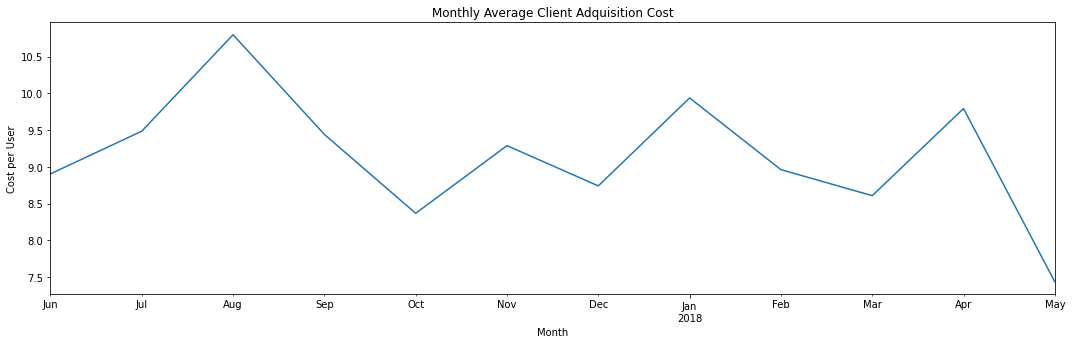

In [116]:
test['cac'].plot(figsize=(18,5))
plt.xlabel('Month')
plt.ylabel('Cost per User')
plt.title('Monthly Average Client Adquisition Cost')

Una vez teniendo la tabla con los resultados, podemos terminar de confirmar con la gráfica que Agosto fue el mes en el que más se gastó para adquisición de clientes con un total de 10.8 dolares por cliente. El mes con menor costo en Marketing fue Mayo con 7.4 dolares por cliente.

#### ROMI

Dado que el CAC y LTV se calcularon de manera general en la sección anterior (sin tomar en cuenta la fuente de la que provenían), en esta habrá que volverse a calcular, pero ahora sí separando los datos por su fuente de marketing.

In [76]:
fst_ord

,uid,fst_ord_month
0,10000837700716403746,2017-06-01
1,10000997030965831953,2018-01-01
2,10001199569370567060,2017-11-01
3,10002243978166172255,2017-10-01
4,10003351403065971701,2017-11-01
...,...,...
36518,999745712858219747,2017-08-01
36519,9997777271989789335,2017-11-01
36520,999906621142257600,2018-01-01
36521,9999334409150825432,2017-12-01


La tabla 'orderss' calculada anteriormente se agrupa por usuario y mes para tener la cantidad total de compra que realizó cada usuario.

In [77]:
orderss = orderss.groupby(['uid', 'month']).agg({'revenue':'sum'}).reset_index()
orderss

,uid,month,revenue
0,10000837700716403746,2017-06-01,2.20
1,10000997030965831953,2018-01-01,1.83
2,10001199569370567060,2017-11-01,1.00
3,10002243978166172255,2017-10-01,9.16
4,10002243978166172255,2017-12-01,8.25
...,...,...,...
41014,999745712858219747,2017-08-01,0.73
41015,9997777271989789335,2017-11-01,11.61
41016,999906621142257600,2018-01-01,0.98
41017,9999334409150825432,2017-12-01,0.98


Ahora, creamos la variable 'source' en donde se tiene solamente el usuario y la fuente de la cual realizaron su primera compra.

In [78]:
source = visits.sort_values(by='start ts').groupby('uid').first()['source id']
source

uid
10000171586432207426    3
10000344846682484395    3
1000036778515242839     3
10000460875579931334    4
10000558740593440652    4
                       ..
9999530179466660745     3
9999704916412649026     4
9999829453910784044     3
9999912853550499774     4
9999996800317156310     3
Name: source id, Length: 228169, dtype: int64

Se juntan la tabla de 'orderss' y 'source'. Después, al igual que con el cálculo del CAC general, se calculan los costos de Marketing mensuales, pero ahora para cada fuente.

In [79]:
ord_sour = pd.merge(orderss, source, left_on='uid', right_index=True)
ord_sour

,uid,month,revenue,source id
0,10000837700716403746,2017-06-01,2.20,4
1,10000997030965831953,2018-01-01,1.83,4
2,10001199569370567060,2017-11-01,1.00,4
3,10002243978166172255,2017-10-01,9.16,4
4,10002243978166172255,2017-12-01,8.25,4
...,...,...,...,...
41014,999745712858219747,2017-08-01,0.73,3
41015,9997777271989789335,2017-11-01,11.61,3
41016,999906621142257600,2018-01-01,0.98,2
41017,9999334409150825432,2017-12-01,0.98,3


In [119]:
month_costs_source = costs.groupby(['source id', 'month']).agg({'costs':'sum'})
month_costs_source

costs
source id month              
1         2017-06-01  1125.61
          2017-07-01  1072.88
          2017-08-01   951.81
          2017-09-01  1502.01
          2017-10-01  2315.75
...                       ...
10        2018-01-01   614.35
          2018-02-01   480.88
          2018-03-01   526.41
          2018-04-01   388.25
          2018-05-01   409.86

[84 rows x 1 columns]

Se juntan las tablas conseguidas anteriormente en donde se conseguirá una tabla aglomerando el usuario, mes de compra, ingreso para la empresa, fuente y costos de marketing para ese mes.

In [120]:
sour_month_rev = ord_sour.merge(month_costs_source, on=['source id', 'month'])
sour_month_rev

,uid,month,revenue,source id,costs
0,10000837700716403746,2017-06-01,2.20,4,3514.80
1,10021470483809348974,2017-06-01,6.11,4,3514.80
2,10122262604714757549,2017-06-01,3.67,4,3514.80
3,10308683708945899048,2017-06-01,3.67,4,3514.80
4,1033532462431445169,2017-06-01,0.18,4,3514.80
...,...,...,...,...,...
41012,7581311102661613893,2017-08-01,0.61,10,232.57
41013,7848592639103365444,2017-08-01,1.22,10,232.57
41014,8095834927811026289,2017-08-01,3.91,10,232.57
41015,854058517493797557,2017-08-01,3.67,10,232.57


Jalamos la tabla 'fst_ord' con el mes de la primera comprar de los usuarios y la unimos a 'sour_month_rev'.

In [84]:
sour_month_rev = sour_month_rev.merge(fst_ord, on='uid')
sour_month_rev

,uid,month,revenue,source id,costs,fst_ord_month
0,10000837700716403746,2017-06-01,2.20,4,3514.80,2017-06-01
1,10021470483809348974,2017-06-01,6.11,4,3514.80,2017-06-01
2,10122262604714757549,2017-06-01,3.67,4,3514.80,2017-06-01
3,10122262604714757549,2017-12-01,6.10,4,7680.47,2017-06-01
4,10122262604714757549,2018-03-01,4.89,4,5961.87,2017-06-01
...,...,...,...,...,...,...
41012,7581311102661613893,2017-08-01,0.61,10,232.57,2017-08-01
41013,7848592639103365444,2017-08-01,1.22,10,232.57,2017-08-01
41014,8095834927811026289,2017-08-01,3.91,10,232.57,2017-08-01
41015,854058517493797557,2017-08-01,3.67,10,232.57,2017-08-01


In [85]:
#for source_id, df in sour_month_rev.groupby('source id'):
#    source_id, df.groupby('buy month').agg({'uid':'nunique'})
#    print(df)

In [86]:
#for source_id in sour_month_rev.groupby('source id'):
#    print(source_id)

Creamos la tabla 'report_final' en donde se empezarán a hacer los cálculos del CAC, LTV y ROMI. 

Se agrupa la tabla de forma que nos muestre las ganancias y número de usuarios únicos totales para cada mes, primer mes de compra, fuente y costos de marketing respectivos.

In [87]:
report_final = sour_month_rev.groupby(['month', 'fst_ord_month', 'source id', 'costs']).agg({'uid':'nunique', 'revenue':'sum'}).reset_index()
report_final

,month,fst_ord_month,source id,costs,uid,revenue
0,2017-06-01,2017-06-01,1,1125.61,190,1378.70
1,2017-06-01,2017-06-01,2,2427.38,235,1043.68
2,2017-06-01,2017-06-01,3,7731.65,638,2804.34
3,2017-06-01,2017-06-01,4,3514.80,413,1959.84
4,2017-06-01,2017-06-01,5,2616.12,384,1898.89
...,...,...,...,...,...,...
509,2018-05-01,2018-05-01,3,9411.42,844,3256.54
510,2018-05-01,2018-05-01,4,4214.21,804,3802.91
511,2018-05-01,2018-05-01,5,3669.56,497,2094.04
512,2018-05-01,2018-05-01,9,362.17,60,223.05


In [88]:
report_final['gp'] = report_final['revenue']
report_final['age'] = (report_final['month'] - report_final['fst_ord_month']) / np.timedelta64(1, 'M')
report_final['age'] = report_final['age'].round().astype('int')
report_final.head(150)

,month,fst_ord_month,source id,costs,uid,revenue,gp,age
0,2017-06-01,2017-06-01,1,1125.61,190,1378.70,1378.70,0
1,2017-06-01,2017-06-01,2,2427.38,235,1043.68,1043.68,0
2,2017-06-01,2017-06-01,3,7731.65,638,2804.34,2804.34,0
3,2017-06-01,2017-06-01,4,3514.80,413,1959.84,1959.84,0
4,2017-06-01,2017-06-01,5,2616.12,384,1898.89,1898.89,0
...,...,...,...,...,...,...,...,...
145,2017-12-01,2017-06-01,9,657.98,5,36.17,36.17,6
146,2017-12-01,2017-07-01,1,2341.20,5,143.98,143.98,5
147,2017-12-01,2017-07-01,2,4897.80,6,38.74,38.74,5
148,2017-12-01,2017-07-01,3,16219.52,9,36.34,36.34,5


Dado que no tenemos un porcentaje de margen de ganancia, aplicamos la igualdad entre las ganancias y el beneficio bruto para sacar la columna 'gp'.

También se crea la columna 'age' para definición de las cohortes con su número de usuarios respectivos. Esto nos servirá para hacer los heatmaps a través del tiempo.

A continuación, se dividen los costos entre la cantidad de usuarios para sacar el CAC. Separamos por fuente de marketing y hacemos heatmaps que muestre el comportamiento del CAC a través del tiempo.

In [89]:
report_final['cac'] = report_final['costs'] / report_final['uid']
report_final

,month,fst_ord_month,source id,costs,uid,revenue,gp,age,cac
0,2017-06-01,2017-06-01,1,1125.61,190,1378.70,1378.70,0,5.924263
1,2017-06-01,2017-06-01,2,2427.38,235,1043.68,1043.68,0,10.329277
2,2017-06-01,2017-06-01,3,7731.65,638,2804.34,2804.34,0,12.118574
3,2017-06-01,2017-06-01,4,3514.80,413,1959.84,1959.84,0,8.510412
4,2017-06-01,2017-06-01,5,2616.12,384,1898.89,1898.89,0,6.812813
...,...,...,...,...,...,...,...,...,...
509,2018-05-01,2018-05-01,3,9411.42,844,3256.54,3256.54,0,11.150972
510,2018-05-01,2018-05-01,4,4214.21,804,3802.91,3802.91,0,5.241555
511,2018-05-01,2018-05-01,5,3669.56,497,2094.04,2094.04,0,7.383421
512,2018-05-01,2018-05-01,9,362.17,60,223.05,223.05,0,6.036167


In [90]:
report_final['fst_ord_month'] = report_final['fst_ord_month'].dt.strftime('%Y-%m-%d') 

<AxesSubplot:title={'center':'CAC - Source 1'}, xlabel='age', ylabel='fst_ord_month'>

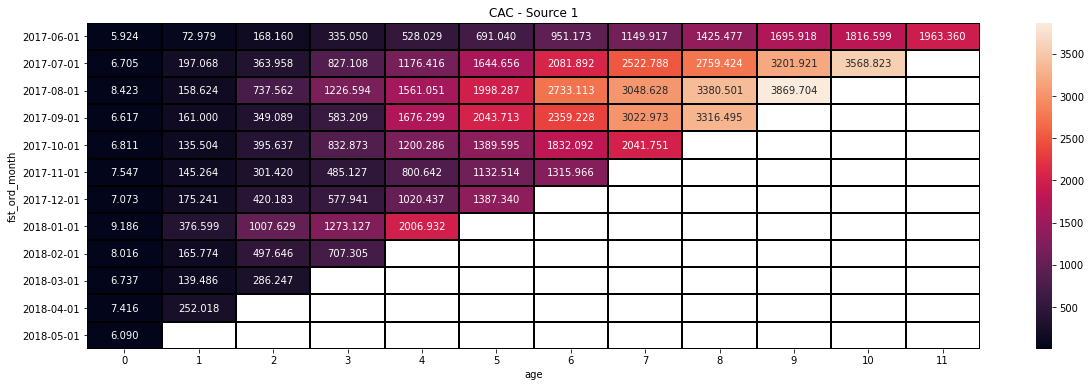

In [91]:
cac_source_1 = report_final[report_final['source id'] == 1]
cac_source_1 = cac_source_1.pivot_table(index='fst_ord_month', columns='age', values='cac', aggfunc='mean').cumsum(axis=1).round(3)

plt.figure(figsize=(20,6))
plt.title('CAC - Source 1')
sns.heatmap(cac_source_1, annot=True, fmt='.3f', linewidths=1, linecolor='black')

A primeras llama la atención los altos montos de gastos por cliente, pero recordemos que, a lo largo del tiempo y debido a la baja retención de usuarios obtenida en la sección 2.1.4, vemos que los gastos de marketing a los que incurre la empresa es muy alto para la baja cantidad de usuarios que compran en tal mes de tal cohorte. Esto provoca que, al sacar el promedio de gastos entre número de clientes, los gastos sean muy altos.

Este comportamiento se refleja en todas las fuentes. Lo importante será estudiar el retorno de inversión a ver si la situación es tan mala como parece.

<AxesSubplot:title={'center':'CAC - Source 2'}, xlabel='age', ylabel='fst_ord_month'>

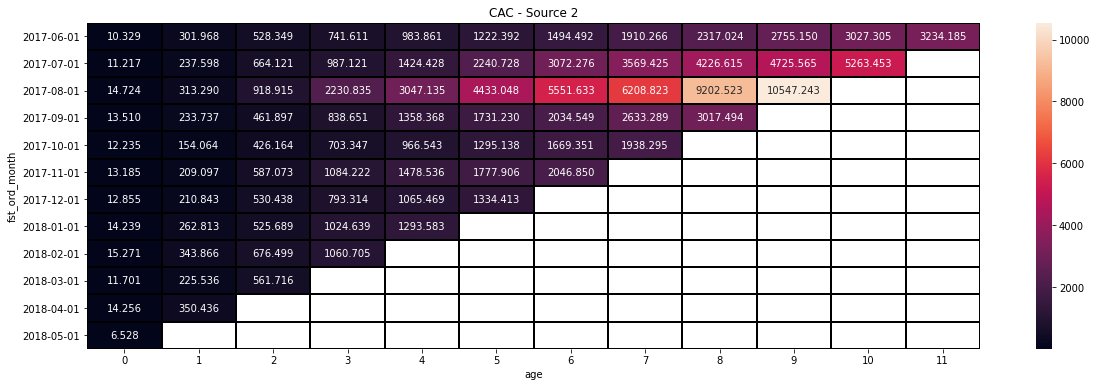

In [92]:
cac_source_2 = report_final[report_final['source id'] == 2]
cac_source_2 = cac_source_2.pivot_table(index='fst_ord_month', columns='age', values='cac', aggfunc='mean').cumsum(axis=1).round(3)

plt.figure(figsize=(20,6))
plt.title('CAC - Source 2')
sns.heatmap(cac_source_2, annot=True, fmt='.3f', linewidths=1, linecolor='black')

<AxesSubplot:title={'center':'CAC - Source 3'}, xlabel='age', ylabel='fst_ord_month'>

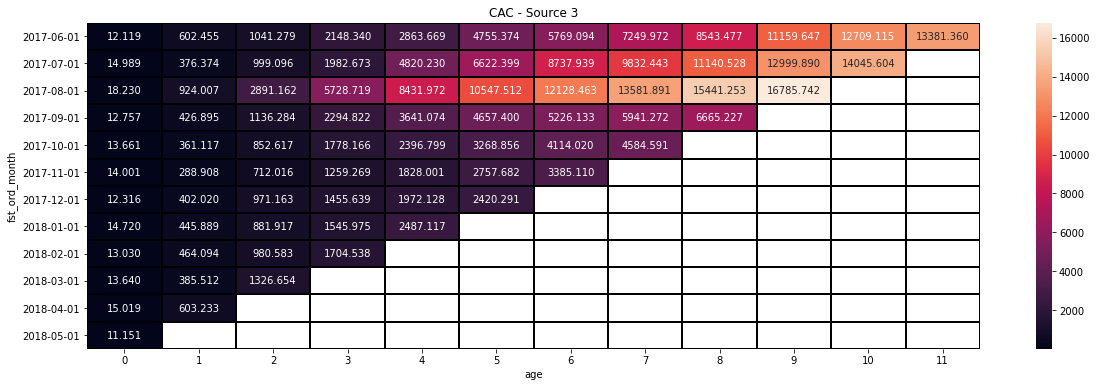

In [93]:
cac_source_3 = report_final[report_final['source id'] == 3]
cac_source_3 = cac_source_3.pivot_table(index='fst_ord_month', columns='age', values='cac', aggfunc='mean').cumsum(axis=1).round(3)

plt.figure(figsize=(20,6))
plt.title('CAC - Source 3')
sns.heatmap(cac_source_3, annot=True, fmt='.3f', linewidths=1, linecolor='black')

<AxesSubplot:title={'center':'CAC - Source 4'}, xlabel='age', ylabel='fst_ord_month'>

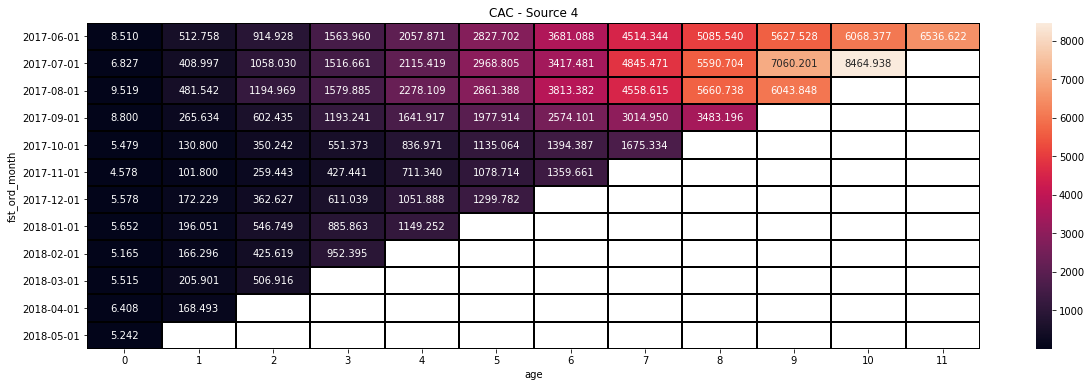

In [94]:
cac_source_4 = report_final[report_final['source id'] == 4]
cac_source_4 = cac_source_4.pivot_table(index='fst_ord_month', columns='age', values='cac', aggfunc='mean').cumsum(axis=1).round(3)

plt.figure(figsize=(20,6))
plt.title('CAC - Source 4')
sns.heatmap(cac_source_4, annot=True, fmt='.3f', linewidths=1, linecolor='black')

<AxesSubplot:title={'center':'CAC - Source 5'}, xlabel='age', ylabel='fst_ord_month'>

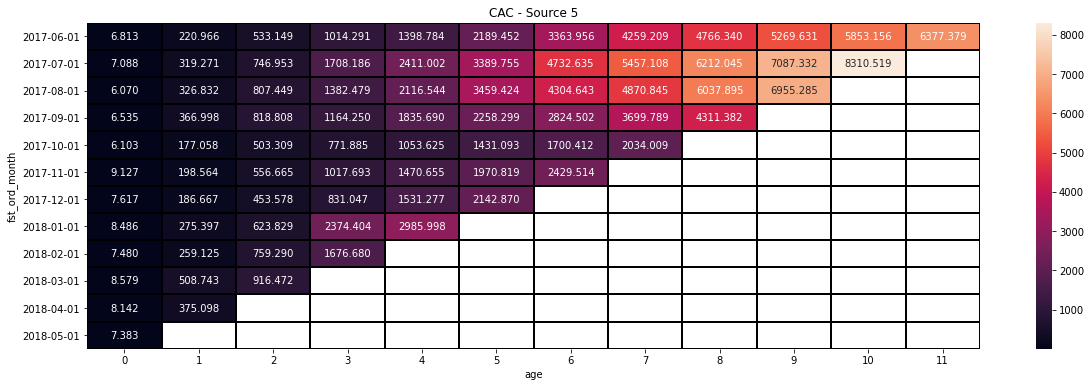

In [95]:
cac_source_5 = report_final[report_final['source id'] == 5]
cac_source_5 = cac_source_5.pivot_table(index='fst_ord_month', columns='age', values='cac', aggfunc='mean').cumsum(axis=1).round(3)

plt.figure(figsize=(20,6))
plt.title('CAC - Source 5')
sns.heatmap(cac_source_5, annot=True, fmt='.3f', linewidths=1, linecolor='black')

<AxesSubplot:title={'center':'CAC - Source 9'}, xlabel='age', ylabel='fst_ord_month'>

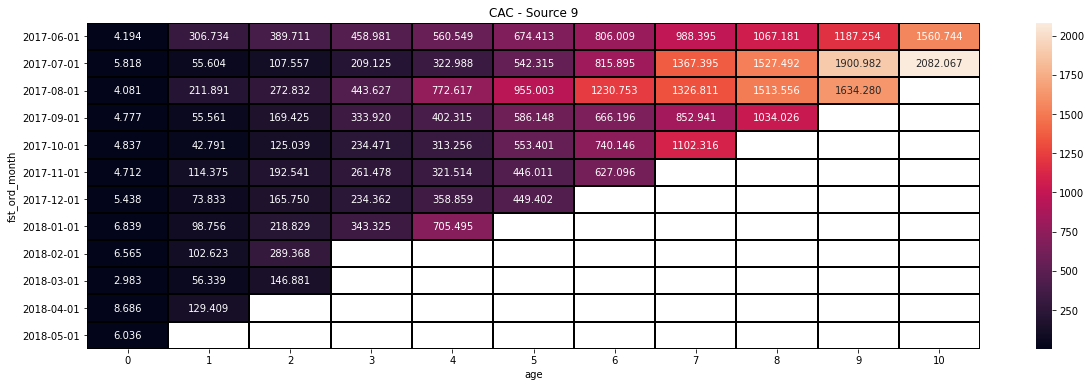

In [96]:
cac_source_9 = report_final[report_final['source id'] == 9]
cac_source_9 = cac_source_9.pivot_table(index='fst_ord_month', columns='age', values='cac', aggfunc='mean').cumsum(axis=1).round(3)

plt.figure(figsize=(20,6))
plt.title('CAC - Source 9')
sns.heatmap(cac_source_9, annot=True, fmt='.3f', linewidths=1, linecolor='black')

<AxesSubplot:title={'center':'CAC - Source 10'}, xlabel='age', ylabel='fst_ord_month'>

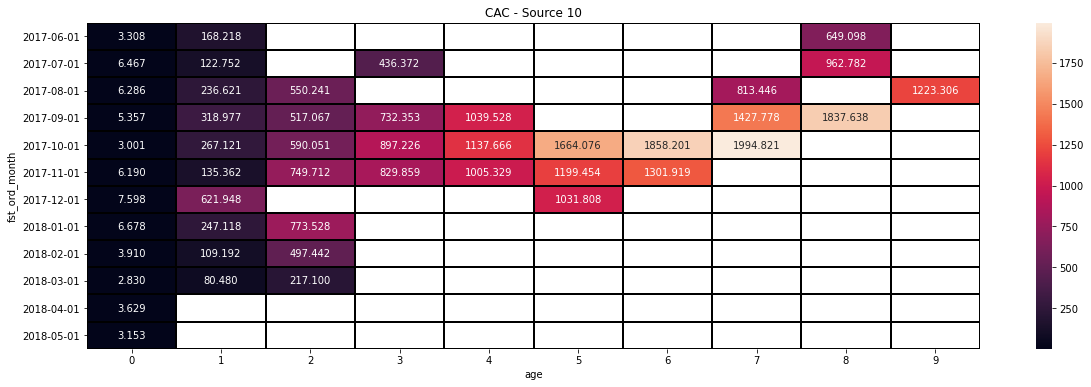

In [97]:
cac_source_10 = report_final[report_final['source id'] == 10]
cac_source_10 = cac_source_10.pivot_table(index='fst_ord_month', columns='age', values='cac', aggfunc='mean').cumsum(axis=1).round(3)

plt.figure(figsize=(20,6))
plt.title('CAC - Source 10')
sns.heatmap(cac_source_10, annot=True, fmt='.3f', linewidths=1, linecolor='black')

Como se vio en la sección 2.3.1, la fuente a la cual más dinero se le inyectó fue a la fuente 3, mientras que a las que menos se le invirtió en marketing fue a las fuentes 9 y 10.

In [98]:
report_final['ltv'] = report_final['gp'] / report_final['uid']
report_final

,month,fst_ord_month,source id,costs,uid,revenue,gp,age,cac,ltv
0,2017-06-01,2017-06-01,1,1125.61,190,1378.70,1378.70,0,5.924263,7.256316
1,2017-06-01,2017-06-01,2,2427.38,235,1043.68,1043.68,0,10.329277,4.441191
2,2017-06-01,2017-06-01,3,7731.65,638,2804.34,2804.34,0,12.118574,4.395517
3,2017-06-01,2017-06-01,4,3514.80,413,1959.84,1959.84,0,8.510412,4.745375
4,2017-06-01,2017-06-01,5,2616.12,384,1898.89,1898.89,0,6.812813,4.945026
...,...,...,...,...,...,...,...,...,...,...
509,2018-05-01,2018-05-01,3,9411.42,844,3256.54,3256.54,0,11.150972,3.858460
510,2018-05-01,2018-05-01,4,4214.21,804,3802.91,3802.91,0,5.241555,4.729988
511,2018-05-01,2018-05-01,5,3669.56,497,2094.04,2094.04,0,7.383421,4.213360
512,2018-05-01,2018-05-01,9,362.17,60,223.05,223.05,0,6.036167,3.717500


Para el cálculo del LTV, o Livetime Value, que básicamente representa la cantidad de dinero gastado por cliente durante cierto tiempo, se dividen los ingresos entre la cantidad de clientes por cohortes. 

Luego, se sacan los heatmaps para mayor visualización de los datos.

<AxesSubplot:title={'center':'LTV - Source 1'}, xlabel='age', ylabel='fst_ord_month'>

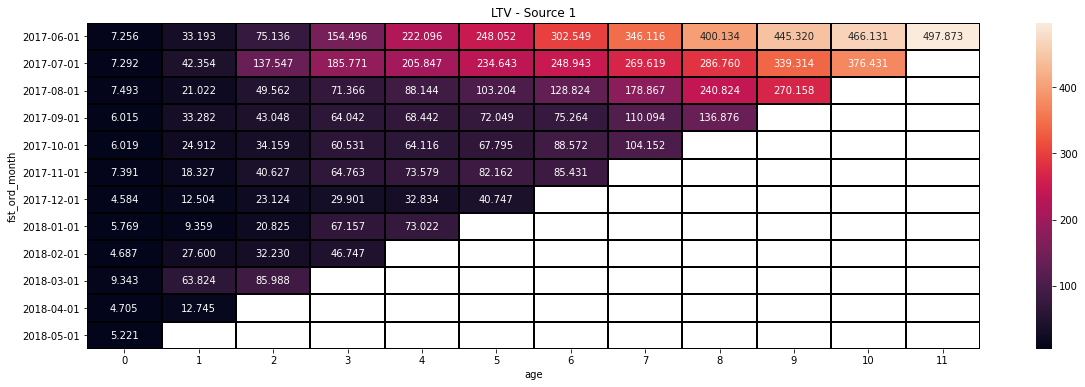

In [99]:
ltv_source_1 = report_final[report_final['source id'] == 1]
ltv_source_1 = ltv_source_1.pivot_table(index='fst_ord_month', columns='age', values='ltv', aggfunc='mean').cumsum(axis=1).round(3)

plt.figure(figsize=(20,6))
plt.title('LTV - Source 1')
sns.heatmap(ltv_source_1, annot=True, fmt='.3f', linewidths=1, linecolor='black')

<AxesSubplot:title={'center':'LTV - Source 2'}, xlabel='age', ylabel='fst_ord_month'>

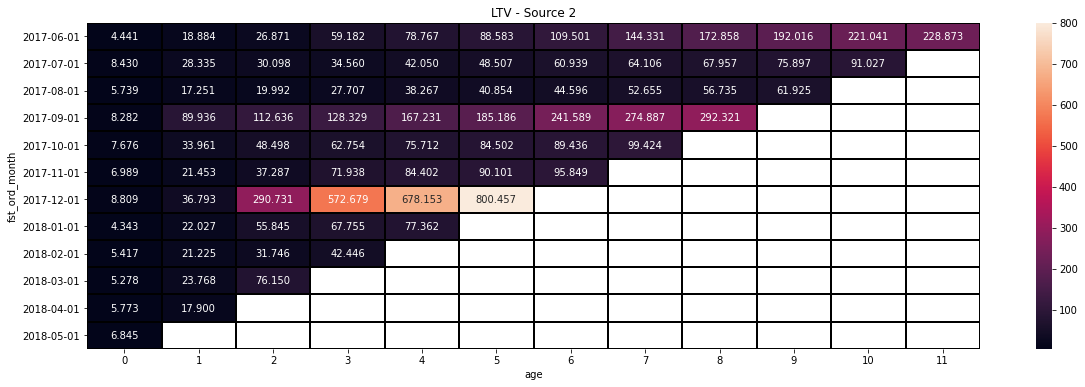

In [100]:
ltv_source_2 = report_final[report_final['source id'] == 2]
ltv_source_2 = ltv_source_2.pivot_table(index='fst_ord_month', columns='age', values='ltv', aggfunc='mean').cumsum(axis=1).round(3)

plt.figure(figsize=(20,6))
plt.title('LTV - Source 2')
sns.heatmap(ltv_source_2, annot=True, fmt='.3f', linewidths=1, linecolor='black')

<AxesSubplot:title={'center':'LTV - Source 3'}, xlabel='age', ylabel='fst_ord_month'>

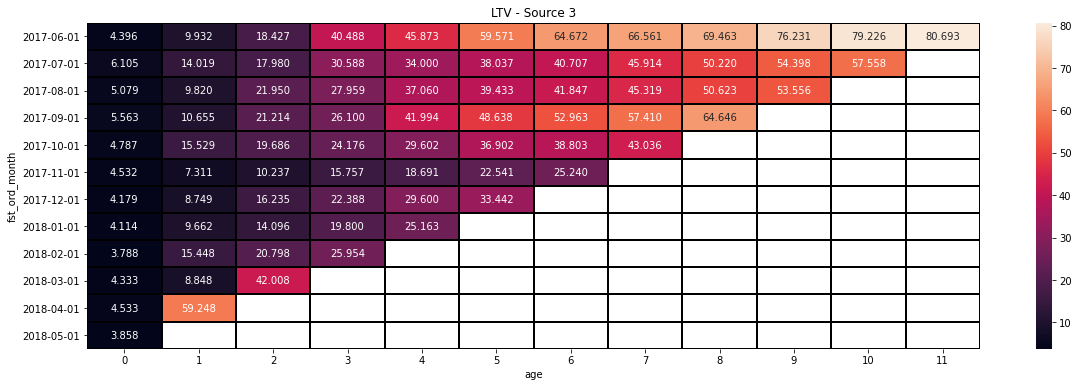

In [101]:
ltv_source_3 = report_final[report_final['source id'] == 3]
ltv_source_3 = ltv_source_3.pivot_table(index='fst_ord_month', columns='age', values='ltv', aggfunc='mean').cumsum(axis=1).round(3)

plt.figure(figsize=(20,6))
plt.title('LTV - Source 3')
sns.heatmap(ltv_source_3, annot=True, fmt='.3f', linewidths=1, linecolor='black')

<AxesSubplot:title={'center':'LTV - Source 4'}, xlabel='age', ylabel='fst_ord_month'>

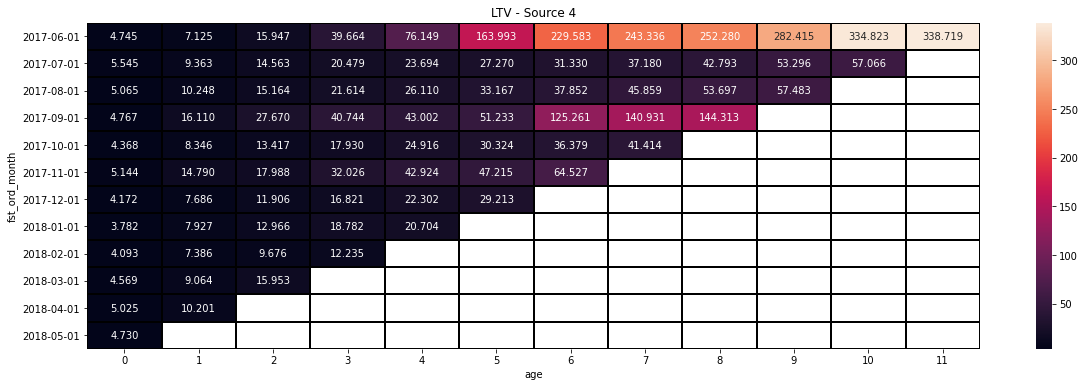

In [102]:
ltv_source_4 = report_final[report_final['source id'] == 4]
ltv_source_4 = ltv_source_4.pivot_table(index='fst_ord_month', columns='age', values='ltv', aggfunc='mean').cumsum(axis=1).round(3)

plt.figure(figsize=(20,6))
plt.title('LTV - Source 4')
sns.heatmap(ltv_source_4, annot=True, fmt='.3f', linewidths=1, linecolor='black')

<AxesSubplot:title={'center':'LTV - Source 5'}, xlabel='age', ylabel='fst_ord_month'>

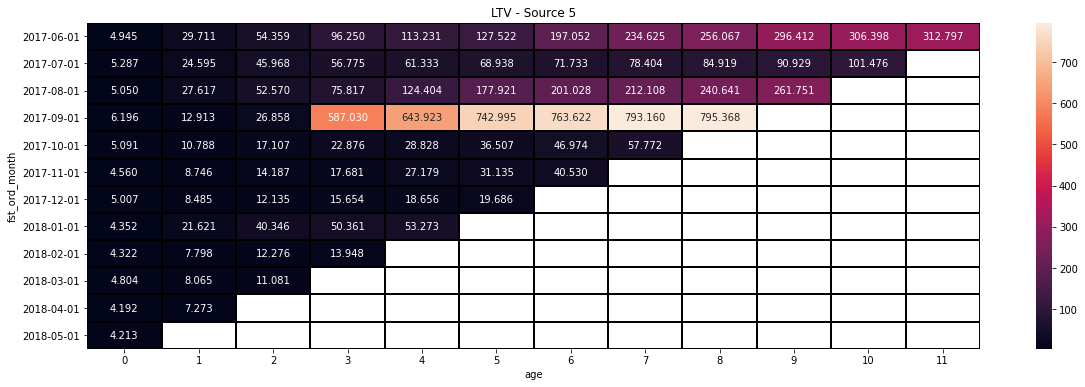

In [103]:
ltv_source_5 = report_final[report_final['source id'] == 5]
ltv_source_5 = ltv_source_5.pivot_table(index='fst_ord_month', columns='age', values='ltv', aggfunc='mean').cumsum(axis=1).round(3)

plt.figure(figsize=(20,6))
plt.title('LTV - Source 5')
sns.heatmap(ltv_source_5, annot=True, fmt='.3f', linewidths=1, linecolor='black')

<AxesSubplot:title={'center':'LTV - Source 9'}, xlabel='age', ylabel='fst_ord_month'>

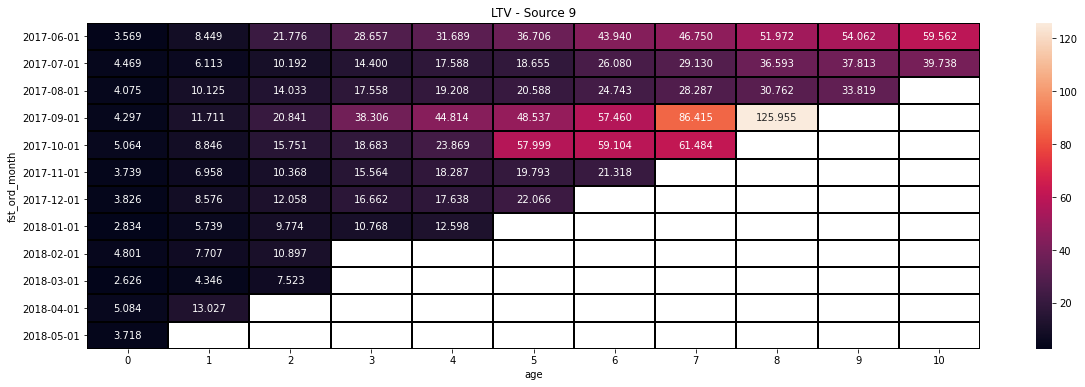

In [104]:
ltv_source_9 = report_final[report_final['source id'] == 9]
ltv_source_9 = ltv_source_9.pivot_table(index='fst_ord_month', columns='age', values='ltv', aggfunc='mean').cumsum(axis=1).round(3)

plt.figure(figsize=(20,6))
plt.title('LTV - Source 9')
sns.heatmap(ltv_source_9, annot=True, fmt='.3f', linewidths=1, linecolor='black')

<AxesSubplot:title={'center':'LTV - Source 10'}, xlabel='age', ylabel='fst_ord_month'>

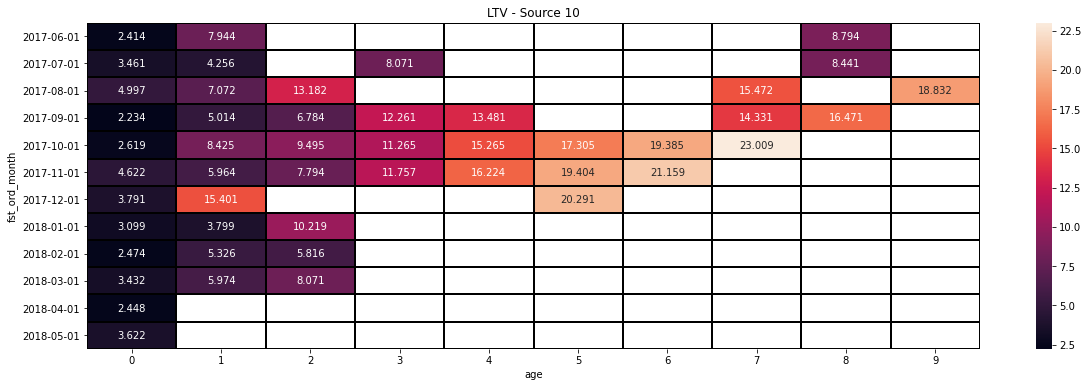

In [105]:
ltv_source_10 = report_final[report_final['source id'] == 10]
ltv_source_10 = ltv_source_10.pivot_table(index='fst_ord_month', columns='age', values='ltv', aggfunc='mean').cumsum(axis=1).round(3)

plt.figure(figsize=(20,6))
plt.title('LTV - Source 10')
sns.heatmap(ltv_source_10, annot=True, fmt='.3f', linewidths=1, linecolor='black')

Viendo los mapas se podría decir que la fuente que más aportó fue la número 1. Incluso más que la número 3. Aunque la fuente 3 es de bajo aporte por parte de los clientes, los que menos gastaron fueron aquellos clientes de las fuentes 9 y 10.

In [106]:
report_final['romi'] = report_final['ltv'] / report_final['cac']
report_final.head(20)

,month,fst_ord_month,source id,costs,uid,revenue,gp,age,cac,ltv,romi
0,2017-06-01,2017-06-01,1,1125.61,190,1378.70,1378.70,0,5.924263,7.256316,1.224847
1,2017-06-01,2017-06-01,2,2427.38,235,1043.68,1043.68,0,10.329277,4.441191,0.429962
2,2017-06-01,2017-06-01,3,7731.65,638,2804.34,2804.34,0,12.118574,4.395517,0.362709
3,2017-06-01,2017-06-01,4,3514.80,413,1959.84,1959.84,0,8.510412,4.745375,0.557596
4,2017-06-01,2017-06-01,5,2616.12,384,1898.89,1898.89,0,6.812813,4.945026,0.725842
5,2017-06-01,2017-06-01,9,285.22,68,242.69,242.69,0,4.194412,3.568971,0.850887
6,2017-06-01,2017-06-01,10,314.22,95,229.35,229.35,0,3.307579,2.414211,0.729903
7,2017-07-01,2017-06-01,1,1072.88,16,414.98,414.98,1,67.055000,25.936250,0.386791
8,2017-07-01,2017-06-01,2,2333.11,8,115.54,115.54,1,291.638750,14.442500,0.049522
9,2017-07-01,2017-06-01,3,7674.37,13,71.97,71.97,1,590.336154,5.536154,0.009378


In [107]:
#for source_id, df in report_final.groupby('source id'):
#    df.pivot_table(index='fst_ord_month', columns='age', values='romi', aggfunc='mean').cumsum(axis=1).round(3).reset_index()


<div class="alert alert-block alert-info">
<b>No supe aplicar la formula para no tener que haber hecho gráfica por gráfica.</b> <a class="tocSkip"></a>
</div>

<AxesSubplot:title={'center':'ROMI - Source 1'}, xlabel='age', ylabel='fst_ord_month'>

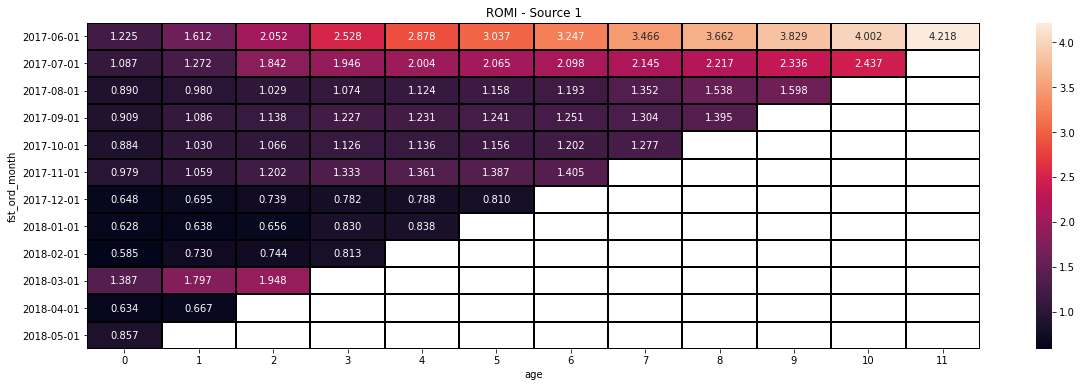

In [108]:
source_1 = report_final[report_final['source id'] == 1]
source_1 = source_1.pivot_table(index='fst_ord_month', columns='age', values='romi', aggfunc='mean').cumsum(axis=1).round(3)

plt.figure(figsize=(20,6))
plt.title('ROMI - Source 1')
sns.heatmap(source_1, annot=True, fmt='.3f', linewidths=1, linecolor='black')

Hablando del retorno de inversión de la fuente número 1, vemos que la mayoría consigue el retorno de la inversión desde el primer mes de vida o en el segundo. Vemos que meses como Diciembre o Enero no lo alcanzan a recuperar incluso 5 meses después.

<AxesSubplot:title={'center':'ROMI - Source 2'}, xlabel='age', ylabel='fst_ord_month'>

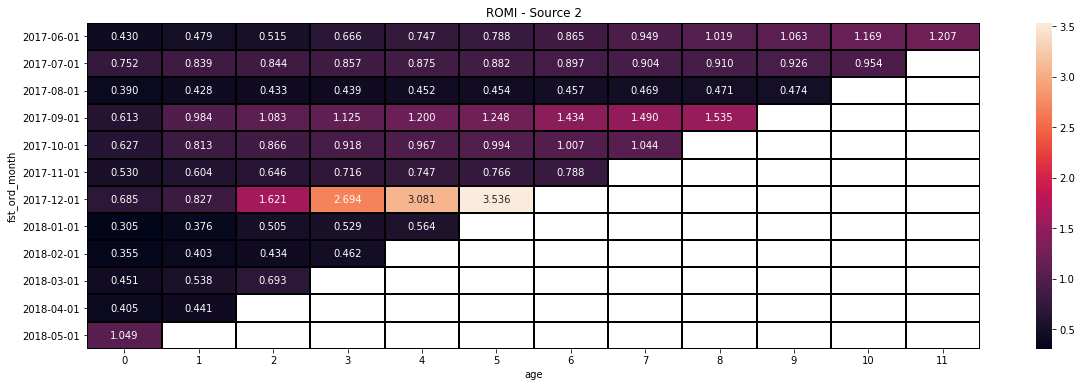

In [109]:
source_2 = report_final[report_final['source id'] == 2]
source_2 = source_2.pivot_table(index='fst_ord_month', columns='age', values='romi', aggfunc='mean').cumsum(axis=1).round(3)

plt.figure(figsize=(20,6))
plt.title('ROMI - Source 2')
sns.heatmap(source_2, annot=True, fmt='.3f', linewidths=1, linecolor='black')

Para a fuente 2 vemos que las cohortes tardan un poco más en recuperar la inversión. El mejor, por así decirlo, fue el grupo de Diciembre que consiguió el retorno después de dos meses y siguió amentando junto con Septiembre, pero a un nivel menor. O el grupo de Mayo que lo consigió desde el mes 0.

Los grupos de Julio o Agosto, por ejemplo, no consiguen retorno de inversión a lo largo del tiempo aunque vayan a la alta.

<AxesSubplot:title={'center':'ROMI - Source 3'}, xlabel='age', ylabel='fst_ord_month'>

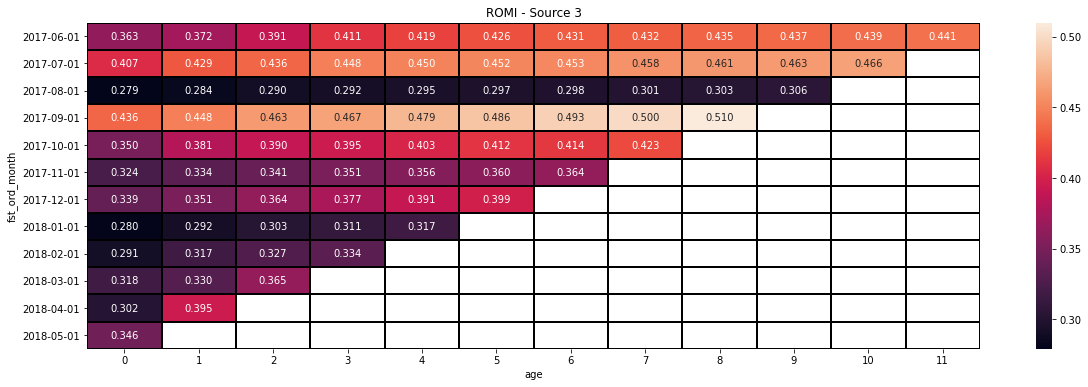

In [110]:
source_3 = report_final[report_final['source id'] == 3]
source_3 = source_3.pivot_table(index='fst_ord_month', columns='age', values='romi', aggfunc='mean').cumsum(axis=1).round(3)

plt.figure(figsize=(20,6))
plt.title('ROMI - Source 3')
sns.heatmap(source_3, annot=True, fmt='.3f', linewidths=1, linecolor='black')

Para la fuente 3 la situación es aún peor. Aunque los valores aumentan, ninguna cohorte alcanza a recuperar su inversión La más cercana es la cohorte de Septiembre que apenas llega a la mitad. 

<AxesSubplot:title={'center':'ROMI - Source 4'}, xlabel='age', ylabel='fst_ord_month'>

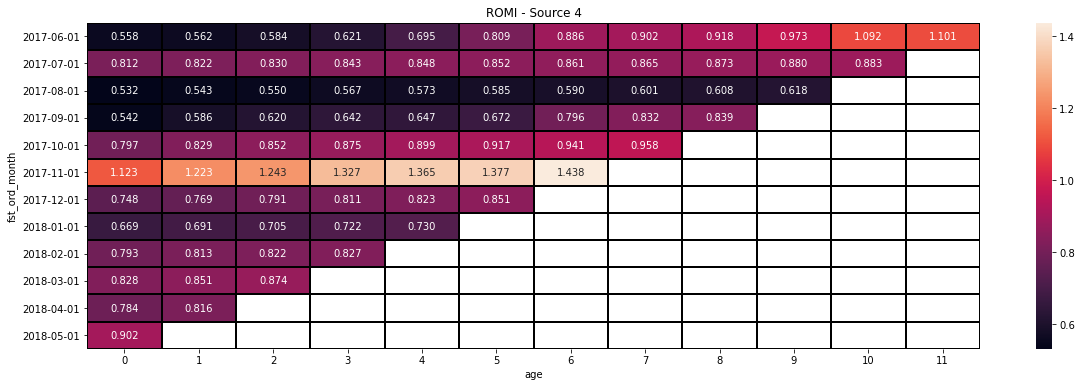

In [111]:
source_4 = report_final[report_final['source id'] == 4]
source_4 = source_4.pivot_table(index='fst_ord_month', columns='age', values='romi', aggfunc='mean').cumsum(axis=1).round(3)

plt.figure(figsize=(20,6))
plt.title('ROMI - Source 4')
sns.heatmap(source_4, annot=True, fmt='.3f', linewidths=1, linecolor='black')

La fuente 4 presenta un mejor panoráma que la fuente 3, pero no mejor que la fuente 1.

La cohorte de Noviembre consigue su retorno desde el mes 0, la cohorte de Junio la consigue hasta el mes 10 de vida y aparte de esos dos no hay otro que consiga recuperar sus inversión a pesar de irse acercando.

<AxesSubplot:title={'center':'ROMI - Source 5'}, xlabel='age', ylabel='fst_ord_month'>

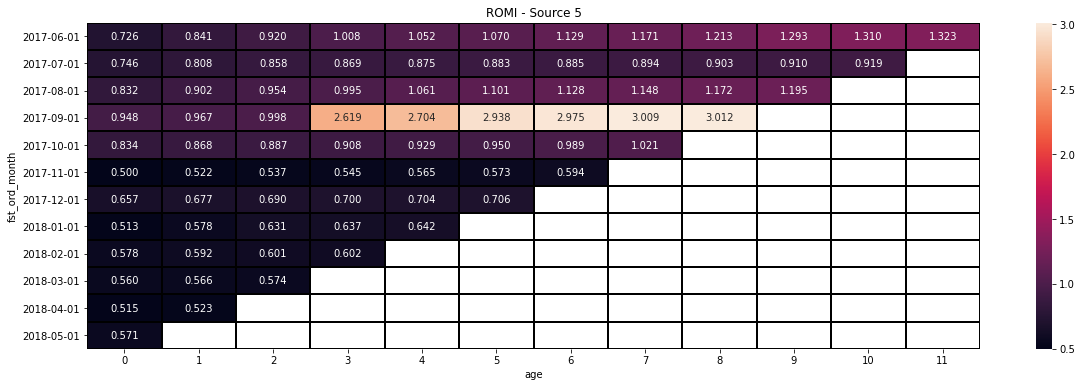

In [112]:
source_5 = report_final[report_final['source id'] == 5]
source_5 = source_5.pivot_table(index='fst_ord_month', columns='age', values='romi', aggfunc='mean').cumsum(axis=1).round(3)

plt.figure(figsize=(20,6))
plt.title('ROMI - Source 5')
sns.heatmap(source_5, annot=True, fmt='.3f', linewidths=1, linecolor='black')

La fuente 5 presenta buen retorno de inversión en su cohorte de de Septiembre que tras 3 meses de vida recupera 2.62 veces su inversión a pesar de que, un mes anterior, no llegaba ni a recuperar la inversión original. 

A partir de la cohorte de Noviembre el retorno de inversión se ve lejano.

<AxesSubplot:title={'center':'ROMI - Source 9'}, xlabel='age', ylabel='fst_ord_month'>

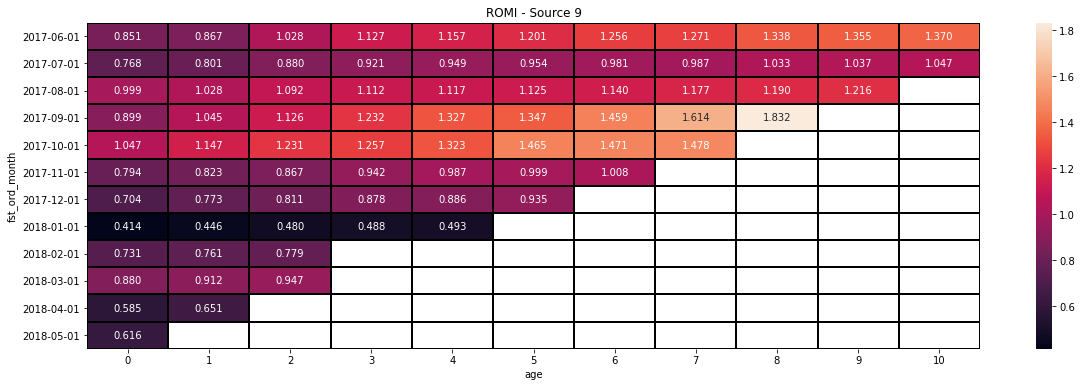

In [113]:
source_9 = report_final[report_final['source id'] == 9]
source_9 = source_9.pivot_table(index='fst_ord_month', columns='age', values='romi', aggfunc='mean').cumsum(axis=1).round(3)

plt.figure(figsize=(20,6))
plt.title('ROMI - Source 9')
sns.heatmap(source_9, annot=True, fmt='.3f', linewidths=1, linecolor='black')

Para la fuente 9, las cohortes de Junio, Agosto, Septiembre y Octubre consiguen su retorno después de un mes, mientras que cohortes a partir de Noviembre presentan mayor dificultad para hacerlo o no lo consiguen.

<AxesSubplot:title={'center':'ROMI - Source 10'}, xlabel='age', ylabel='fst_ord_month'>

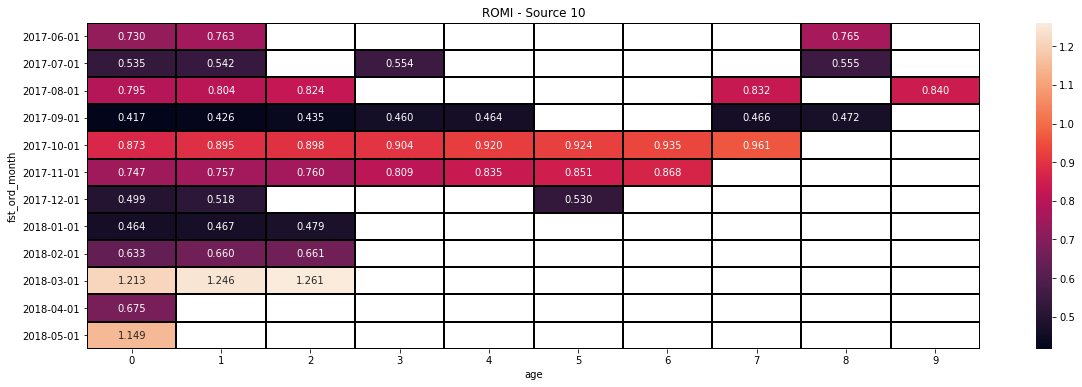

In [114]:
source_10 = report_final[report_final['source id'] == 10]
source_10 = source_10.pivot_table(index='fst_ord_month', columns='age', values='romi', aggfunc='mean').cumsum(axis=1).round(3)

plt.figure(figsize=(20,6))
plt.title('ROMI - Source 10')
sns.heatmap(source_10, annot=True, fmt='.3f', linewidths=1, linecolor='black')

La fuente 10 carece de clientes en algunos meses de distintas cohortes por lo que presenta espacios en blanco.

Por lo visto, tampoco tiene muy buenos resultados respecto al retorno de inversión a excepción de las cohortes de Mayo y Marzo que la recuperan desde su primer mes.

## Conclusión

Viendo los resultados de las tablas, podría decir que la fuente 3 podría reducir sus costos en marketing. Es la fuente que más gasta en promocionarse y, sin embargo, es la que menores ingresos por cliente presenta. Estos ingresos podrian usarse para aumentar la promoción de fuentes como la 1.

Se podría tomar el ejemplo de la fuente nueve que, a pesar de tener pocos clientes, sus gastos por marketing son bajos lo cual les da un buen retorno de inversión. A pesar de esto, la fuente que mejores resultados presentó es la número 1. Tiene costos por marketing relativamente bajos y buen consumo por parte de sus clientes.

<div class="alert alert-block alert-danger">
    
# Comentarios generales 1
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo, Daniel. A lo largo del documento te he dejado una serie de comentarios que sugieren cambios y mejoras para alcanzar los resultados esperados en el objetivo del proyecto. Una vez sean implementados y los problemas corregidos, el proyecto será aprobado.
</div>

<div class="alert alert-block alert-danger">
    
# Comentarios generales 2
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo, Daniel. Has avanzado en algunos puntos pero aún quedan otros por resolver. Hay problemas con duplicación de procesos que pueden dar lugar a errores. Si tienes preguntas, no dudes en consultar a tus tutores.
    
Una vez los problemas sean resueltos, el proyecto será aprobado.
</div>

<div class="alert alert-block alert-success">
    
# Comentarios generales 3
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Gran trabajo, Daniel! Has corregido todo satisfactoriamente y has aprobado un nuevo proyecto ¡Felicitaciones!
</div>